Model the hardware sigmoid using interpolation function

In [1]:
import numpy as np
import math

# LTSpice data (Sweep -3 to +3 at 0.1 interval)
#array_x = [-3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
#array_y = [0.00000865, 0.00000875, 0.00000885, 0.00000895, 0.00000905, 0.0000092, 0.00000935, 0.00000945, 0.00000965, 0.0000098, 0.00001, 0.0000102, 0.00001045, 0.00001075, 0.00001105, 0.00001145, 0.000012, 0.0000126, 0.00001345, 0.0000148, 0.0000182, 0.0014338, 0.0057974, 0.01373525, 0.0259694, 0.04365215, 0.0685189, 0.10347875, 0.15442185, 0.23585775, 0.5, 0.76413945, 0.84557865, 0.8964294, 0.93163305, 0.9564035, 0.97405135, 0.98627465, 0.994187, 0.99857205, 0.99998175, 0.99998715, 0.99998655, 0.9999874, 0.99998805, 0.99998855, 0.99998895, 0.99998925, 0.99998955, 0.9999898, 0.99999, 0.9999902, 0.99999035, 0.99999055, 0.99999065, 0.9999908, 0.99999095, 0.99999105, 0.99999115, 0.99999125, 0.99999135, ]

# LTSpice data (Sweep -3 to +3 at 0.001 interval)
array_x = [3, 2.999, 2.998, 2.997, 2.996, 2.995, 2.994, 2.993, 2.992, 2.991, 2.99, 2.989, 2.988, 2.987, 2.986, 2.985, 2.984, 2.983, 2.982, 2.981, 2.98, 2.979, 2.978, 2.977, 2.976, 2.975, 2.974, 2.973, 2.972, 2.971, 2.97, 2.969, 2.968, 2.967, 2.966, 2.965, 2.964, 2.963, 2.962, 2.961, 2.96, 2.959, 2.958, 2.957, 2.956, 2.955, 2.954, 2.953, 2.952, 2.951, 2.95, 2.949, 2.948, 2.947, 2.946, 2.945, 2.944, 2.943, 2.942, 2.941, 2.94, 2.939, 2.938, 2.937, 2.936, 2.935, 2.934, 2.933, 2.932, 2.931, 2.93, 2.929, 2.928, 2.927, 2.926, 2.925, 2.924, 2.923, 2.922, 2.921, 2.92, 2.919, 2.918, 2.917, 2.916, 2.915, 2.914, 2.913, 2.912, 2.911, 2.91, 2.909, 2.908, 2.907, 2.906, 2.905, 2.904, 2.903, 2.902, 2.901, 2.9, 2.899, 2.898, 2.897, 2.896, 2.895, 2.894, 2.893, 2.892, 2.891, 2.89, 2.889, 2.888, 2.887, 2.886, 2.885, 2.884, 2.883, 2.882, 2.881, 2.88, 2.879, 2.878, 2.877, 2.876, 2.875, 2.874, 2.873, 2.872, 2.871, 2.87, 2.869, 2.868, 2.867, 2.866, 2.865, 2.864, 2.863, 2.862, 2.861, 2.86, 2.859, 2.858, 2.857, 2.856, 2.855, 2.854, 2.853, 2.852, 2.851, 2.85, 2.849, 2.848, 2.847, 2.846, 2.845, 2.844, 2.843, 2.842, 2.841, 2.84, 2.839, 2.838, 2.837, 2.836, 2.835, 2.834, 2.833, 2.832, 2.831, 2.83, 2.829, 2.828, 2.827, 2.826, 2.825, 2.824, 2.823, 2.822, 2.821, 2.82, 2.819, 2.818, 2.817, 2.816, 2.815, 2.814, 2.813, 2.812, 2.811, 2.81, 2.809, 2.808, 2.807, 2.806, 2.805, 2.804, 2.803, 2.802, 2.801, 2.8, 2.799, 2.798, 2.797, 2.796, 2.795, 2.794, 2.793, 2.792, 2.791, 2.79, 2.789, 2.788, 2.787, 2.786, 2.785, 2.784, 2.783, 2.782, 2.781, 2.78, 2.779, 2.778, 2.777, 2.776, 2.775, 2.774, 2.773, 2.772, 2.771, 2.77, 2.769, 2.768, 2.767, 2.766, 2.765, 2.764, 2.763, 2.762, 2.761, 2.76, 2.759, 2.758, 2.757, 2.756, 2.755, 2.754, 2.753, 2.752, 2.751, 2.75, 2.749, 2.748, 2.747, 2.746, 2.745, 2.744, 2.743, 2.742, 2.741, 2.74, 2.739, 2.738, 2.737, 2.736, 2.735, 2.734, 2.733, 2.732, 2.731, 2.73, 2.729, 2.728, 2.727, 2.726, 2.725, 2.724, 2.723, 2.722, 2.721, 2.72, 2.719, 2.718, 2.717, 2.716, 2.715, 2.714, 2.713, 2.712, 2.711, 2.71, 2.709, 2.708, 2.707, 2.706, 2.705, 2.704, 2.703, 2.702, 2.701, 2.7, 2.699, 2.698, 2.697, 2.696, 2.695, 2.694, 2.693, 2.692, 2.691, 2.69, 2.689, 2.688, 2.687, 2.686, 2.685, 2.684, 2.683, 2.682, 2.681, 2.68, 2.679, 2.678, 2.677, 2.676, 2.675, 2.674, 2.673, 2.672, 2.671, 2.67, 2.669, 2.668, 2.667, 2.666, 2.665, 2.664, 2.663, 2.662, 2.661, 2.66, 2.659, 2.658, 2.657, 2.656, 2.655, 2.654, 2.653, 2.652, 2.651, 2.65, 2.649, 2.648, 2.647, 2.646, 2.645, 2.644, 2.643, 2.642, 2.641, 2.64, 2.639, 2.638, 2.637, 2.636, 2.635, 2.634, 2.633, 2.632, 2.631, 2.63, 2.629, 2.628, 2.627, 2.626, 2.625, 2.624, 2.623, 2.622, 2.621, 2.62, 2.619, 2.618, 2.617, 2.616, 2.615, 2.614, 2.613, 2.612, 2.611, 2.61, 2.609, 2.608, 2.607, 2.606, 2.605, 2.604, 2.603, 2.602, 2.601, 2.6, 2.599, 2.598, 2.597, 2.596, 2.595, 2.594, 2.593, 2.592, 2.591, 2.59, 2.589, 2.588, 2.587, 2.586, 2.585, 2.584, 2.583, 2.582, 2.581, 2.58, 2.579, 2.578, 2.577, 2.576, 2.575, 2.574, 2.573, 2.572, 2.571, 2.57, 2.569, 2.568, 2.567, 2.566, 2.565, 2.564, 2.563, 2.562, 2.561, 2.56, 2.559, 2.558, 2.557, 2.556, 2.555, 2.554, 2.553, 2.552, 2.551, 2.55, 2.549, 2.548, 2.547, 2.546, 2.545, 2.544, 2.543, 2.542, 2.541, 2.54, 2.539, 2.538, 2.537, 2.536, 2.535, 2.534, 2.533, 2.532, 2.531, 2.53, 2.529, 2.528, 2.527, 2.526, 2.525, 2.524, 2.523, 2.522, 2.521, 2.52, 2.519, 2.518, 2.517, 2.516, 2.515, 2.514, 2.513, 2.512, 2.511, 2.51, 2.509, 2.508, 2.507, 2.506, 2.505, 2.504, 2.503, 2.502, 2.501, 2.5, 2.499, 2.498, 2.497, 2.496, 2.495, 2.494, 2.493, 2.492, 2.491, 2.49, 2.489, 2.488, 2.487, 2.486, 2.485, 2.484, 2.483, 2.482, 2.481, 2.48, 2.479, 2.478, 2.477, 2.476, 2.475, 2.474, 2.473, 2.472, 2.471, 2.47, 2.469, 2.468, 2.467, 2.466, 2.465, 2.464, 2.463, 2.462, 2.461, 2.46, 2.459, 2.458, 2.457, 2.456, 2.455, 2.454, 2.453, 2.452, 2.451, 2.45, 2.449, 2.448, 2.447, 2.446, 2.445, 2.444, 2.443, 2.442, 2.441, 2.44, 2.439, 2.438, 2.437, 2.436, 2.435, 2.434, 2.433, 2.432, 2.431, 2.43, 2.429, 2.428, 2.427, 2.426, 2.425, 2.424, 2.423, 2.422, 2.421, 2.42, 2.419, 2.418, 2.417, 2.416, 2.415, 2.414, 2.413, 2.412, 2.411, 2.41, 2.409, 2.408, 2.407, 2.406, 2.405, 2.404, 2.403, 2.402, 2.401, 2.4, 2.399, 2.398, 2.397, 2.396, 2.395, 2.394, 2.393, 2.392, 2.391, 2.39, 2.389, 2.388, 2.387, 2.386, 2.385, 2.384, 2.383, 2.382, 2.381, 2.38, 2.379, 2.378, 2.377, 2.376, 2.375, 2.374, 2.373, 2.372, 2.371, 2.37, 2.369, 2.368, 2.367, 2.366, 2.365, 2.364, 2.363, 2.362, 2.361, 2.36, 2.359, 2.358, 2.357, 2.356, 2.355, 2.354, 2.353, 2.352, 2.351, 2.35, 2.349, 2.348, 2.347, 2.346, 2.345, 2.344, 2.343, 2.342, 2.341, 2.34, 2.339, 2.338, 2.337, 2.336, 2.335, 2.334, 2.333, 2.332, 2.331, 2.33, 2.329, 2.328, 2.327, 2.326, 2.325, 2.324, 2.323, 2.322, 2.321, 2.32, 2.319, 2.318, 2.317, 2.316, 2.315, 2.314, 2.313, 2.312, 2.311, 2.31, 2.309, 2.308, 2.307, 2.306, 2.305, 2.304, 2.303, 2.302, 2.301, 2.3, 2.299, 2.298, 2.297, 2.296, 2.295, 2.294, 2.293, 2.292, 2.291, 2.29, 2.289, 2.288, 2.287, 2.286, 2.285, 2.284, 2.283, 2.282, 2.281, 2.28, 2.279, 2.278, 2.277, 2.276, 2.275, 2.274, 2.273, 2.272, 2.271, 2.27, 2.269, 2.268, 2.267, 2.266, 2.265, 2.264, 2.263, 2.262, 2.261, 2.26, 2.259, 2.258, 2.257, 2.256, 2.255, 2.254, 2.253, 2.252, 2.251, 2.25, 2.249, 2.248, 2.247, 2.246, 2.245, 2.244, 2.243, 2.242, 2.241, 2.24, 2.239, 2.238, 2.237, 2.236, 2.235, 2.234, 2.233, 2.232, 2.231, 2.23, 2.229, 2.228, 2.227, 2.226, 2.225, 2.224, 2.223, 2.222, 2.221, 2.22, 2.219, 2.218, 2.217, 2.216, 2.215, 2.214, 2.213, 2.212, 2.211, 2.21, 2.209, 2.208, 2.207, 2.206, 2.205, 2.204, 2.203, 2.202, 2.201, 2.2, 2.199, 2.198, 2.197, 2.196, 2.195, 2.194, 2.193, 2.192, 2.191, 2.19, 2.189, 2.188, 2.187, 2.186, 2.185, 2.184, 2.183, 2.182, 2.181, 2.18, 2.179, 2.178, 2.177, 2.176, 2.175, 2.174, 2.173, 2.172, 2.171, 2.17, 2.169, 2.168, 2.167, 2.166, 2.165, 2.164, 2.163, 2.162, 2.161, 2.16, 2.159, 2.158, 2.157, 2.156, 2.155, 2.154, 2.153, 2.152, 2.151, 2.15, 2.149, 2.148, 2.147, 2.146, 2.145, 2.144, 2.143, 2.142, 2.141, 2.14, 2.139, 2.138, 2.137, 2.136, 2.135, 2.134, 2.133, 2.132, 2.131, 2.13, 2.129, 2.128, 2.127, 2.126, 2.125, 2.124, 2.123, 2.122, 2.121, 2.12, 2.119, 2.118, 2.117, 2.116, 2.115, 2.114, 2.113, 2.112, 2.111, 2.11, 2.109, 2.108, 2.107, 2.106, 2.105, 2.104, 2.103, 2.102, 2.101, 2.1, 2.099, 2.098, 2.097, 2.096, 2.095, 2.094, 2.093, 2.092, 2.091, 2.09, 2.089, 2.088, 2.087, 2.086, 2.085, 2.084, 2.083, 2.082, 2.081, 2.08, 2.079, 2.078, 2.077, 2.076, 2.075, 2.074, 2.073, 2.072, 2.071, 2.07, 2.069, 2.068, 2.067, 2.066, 2.065, 2.064, 2.063, 2.062, 2.061, 2.06, 2.059, 2.058, 2.057, 2.056, 2.055, 2.054, 2.053, 2.052, 2.051, 2.05, 2.049, 2.048, 2.047, 2.046, 2.045, 2.044, 2.043, 2.042, 2.041, 2.04, 2.039, 2.038, 2.037, 2.036, 2.035, 2.034, 2.033, 2.032, 2.031, 2.03, 2.029, 2.028, 2.027, 2.026, 2.025, 2.024, 2.023, 2.022, 2.021, 2.02, 2.019, 2.018, 2.017, 2.016, 2.015, 2.014, 2.013, 2.012, 2.011, 2.01, 2.009, 2.008, 2.007, 2.006, 2.005, 2.004, 2.003, 2.002, 2.001, 2, 1.999, 1.998, 1.997, 1.996, 1.995, 1.994, 1.993, 1.992, 1.991, 1.99, 1.989, 1.988, 1.987, 1.986, 1.985, 1.984, 1.983, 1.982, 1.981, 1.98, 1.979, 1.978, 1.977, 1.976, 1.975, 1.974, 1.973, 1.972, 1.971, 1.97, 1.969, 1.968, 1.967, 1.966, 1.965, 1.964, 1.963, 1.962, 1.961, 1.96, 1.959, 1.958, 1.957, 1.956, 1.955, 1.954, 1.953, 1.952, 1.951, 1.95, 1.949, 1.948, 1.947, 1.946, 1.945, 1.944, 1.943, 1.942, 1.941, 1.94, 1.939, 1.938, 1.937, 1.936, 1.935, 1.934, 1.933, 1.932, 1.931, 1.93, 1.929, 1.928, 1.927, 1.926, 1.925, 1.924, 1.923, 1.922, 1.921, 1.92, 1.919, 1.918, 1.917, 1.916, 1.915, 1.914, 1.913, 1.912, 1.911, 1.91, 1.909, 1.908, 1.907, 1.906, 1.905, 1.904, 1.903, 1.902, 1.901, 1.9, 1.899, 1.898, 1.897, 1.896, 1.895, 1.894, 1.893, 1.892, 1.891, 1.89, 1.889, 1.888, 1.887, 1.886, 1.885, 1.884, 1.883, 1.882, 1.881, 1.88, 1.879, 1.878, 1.877, 1.876, 1.875, 1.874, 1.873, 1.872, 1.871, 1.87, 1.869, 1.868, 1.867, 1.866, 1.865, 1.864, 1.863, 1.862, 1.861, 1.86, 1.859, 1.858, 1.857, 1.856, 1.855, 1.854, 1.853, 1.852, 1.851, 1.85, 1.849, 1.848, 1.847, 1.846, 1.845, 1.844, 1.843, 1.842, 1.841, 1.84, 1.839, 1.838, 1.837, 1.836, 1.835, 1.834, 1.833, 1.832, 1.831, 1.83, 1.829, 1.828, 1.827, 1.826, 1.825, 1.824, 1.823, 1.822, 1.821, 1.82, 1.819, 1.818, 1.817, 1.816, 1.815, 1.814, 1.813, 1.812, 1.811, 1.81, 1.809, 1.808, 1.807, 1.806, 1.805, 1.804, 1.803, 1.802, 1.801, 1.8, 1.799, 1.798, 1.797, 1.796, 1.795, 1.794, 1.793, 1.792, 1.791, 1.79, 1.789, 1.788, 1.787, 1.786, 1.785, 1.784, 1.783, 1.782, 1.781, 1.78, 1.779, 1.778, 1.777, 1.776, 1.775, 1.774, 1.773, 1.772, 1.771, 1.77, 1.769, 1.768, 1.767, 1.766, 1.765, 1.764, 1.763, 1.762, 1.761, 1.76, 1.759, 1.758, 1.757, 1.756, 1.755, 1.754, 1.753, 1.752, 1.751, 1.75, 1.749, 1.748, 1.747, 1.746, 1.745, 1.744, 1.743, 1.742, 1.741, 1.74, 1.739, 1.738, 1.737, 1.736, 1.735, 1.734, 1.733, 1.732, 1.731, 1.73, 1.729, 1.728, 1.727, 1.726, 1.725, 1.724, 1.723, 1.722, 1.721, 1.72, 1.719, 1.718, 1.717, 1.716, 1.715, 1.714, 1.713, 1.712, 1.711, 1.71, 1.709, 1.708, 1.707, 1.706, 1.705, 1.704, 1.703, 1.702, 1.701, 1.7, 1.699, 1.698, 1.697, 1.696, 1.695, 1.694, 1.693, 1.692, 1.691, 1.69, 1.689, 1.688, 1.687, 1.686, 1.685, 1.684, 1.683, 1.682, 1.681, 1.68, 1.679, 1.678, 1.677, 1.676, 1.675, 1.674, 1.673, 1.672, 1.671, 1.67, 1.669, 1.668, 1.667, 1.666, 1.665, 1.664, 1.663, 1.662, 1.661, 1.66, 1.659, 1.658, 1.657, 1.656, 1.655, 1.654, 1.653, 1.652, 1.651, 1.65, 1.649, 1.648, 1.647, 1.646, 1.645, 1.644, 1.643, 1.642, 1.641, 1.64, 1.639, 1.638, 1.637, 1.636, 1.635, 1.634, 1.633, 1.632, 1.631, 1.63, 1.629, 1.628, 1.627, 1.626, 1.625, 1.624, 1.623, 1.622, 1.621, 1.62, 1.619, 1.618, 1.617, 1.616, 1.615, 1.614, 1.613, 1.612, 1.611, 1.61, 1.609, 1.608, 1.607, 1.606, 1.605, 1.604, 1.603, 1.602, 1.601, 1.6, 1.599, 1.598, 1.597, 1.596, 1.595, 1.594, 1.593, 1.592, 1.591, 1.59, 1.589, 1.588, 1.587, 1.586, 1.585, 1.584, 1.583, 1.582, 1.581, 1.58, 1.579, 1.578, 1.577, 1.576, 1.575, 1.574, 1.573, 1.572, 1.571, 1.57, 1.569, 1.568, 1.567, 1.566, 1.565, 1.564, 1.563, 1.562, 1.561, 1.56, 1.559, 1.558, 1.557, 1.556, 1.555, 1.554, 1.553, 1.552, 1.551, 1.55, 1.549, 1.548, 1.547, 1.546, 1.545, 1.544, 1.543, 1.542, 1.541, 1.54, 1.539, 1.538, 1.537, 1.536, 1.535, 1.534, 1.533, 1.532, 1.531, 1.53, 1.529, 1.528, 1.527, 1.526, 1.525, 1.524, 1.523, 1.522, 1.521, 1.52, 1.519, 1.518, 1.517, 1.516, 1.515, 1.514, 1.513, 1.512, 1.511, 1.51, 1.509, 1.508, 1.507, 1.506, 1.505, 1.504, 1.503, 1.502, 1.501, 1.5, 1.499, 1.498, 1.497, 1.496, 1.495, 1.494, 1.493, 1.492, 1.491, 1.49, 1.489, 1.488, 1.487, 1.486, 1.485, 1.484, 1.483, 1.482, 1.481, 1.48, 1.479, 1.478, 1.477, 1.476, 1.475, 1.474, 1.473, 1.472, 1.471, 1.47, 1.469, 1.468, 1.467, 1.466, 1.465, 1.464, 1.463, 1.462, 1.461, 1.46, 1.459, 1.458, 1.457, 1.456, 1.455, 1.454, 1.453, 1.452, 1.451, 1.45, 1.449, 1.448, 1.447, 1.446, 1.445, 1.444, 1.443, 1.442, 1.441, 1.44, 1.439, 1.438, 1.437, 1.436, 1.435, 1.434, 1.433, 1.432, 1.431, 1.43, 1.429, 1.428, 1.427, 1.426, 1.425, 1.424, 1.423, 1.422, 1.421, 1.42, 1.419, 1.418, 1.417, 1.416, 1.415, 1.414, 1.413, 1.412, 1.411, 1.41, 1.409, 1.408, 1.407, 1.406, 1.405, 1.404, 1.403, 1.402, 1.401, 1.4, 1.399, 1.398, 1.397, 1.396, 1.395, 1.394, 1.393, 1.392, 1.391, 1.39, 1.389, 1.388, 1.387, 1.386, 1.385, 1.384, 1.383, 1.382, 1.381, 1.38, 1.379, 1.378, 1.377, 1.376, 1.375, 1.374, 1.373, 1.372, 1.371, 1.37, 1.369, 1.368, 1.367, 1.366, 1.365, 1.364, 1.363, 1.362, 1.361, 1.36, 1.359, 1.358, 1.357, 1.356, 1.355, 1.354, 1.353, 1.352, 1.351, 1.35, 1.349, 1.348, 1.347, 1.346, 1.345, 1.344, 1.343, 1.342, 1.341, 1.34, 1.339, 1.338, 1.337, 1.336, 1.335, 1.334, 1.333, 1.332, 1.331, 1.33, 1.329, 1.328, 1.327, 1.326, 1.325, 1.324, 1.323, 1.322, 1.321, 1.32, 1.319, 1.318, 1.317, 1.316, 1.315, 1.314, 1.313, 1.312, 1.311, 1.31, 1.309, 1.308, 1.307, 1.306, 1.305, 1.304, 1.303, 1.302, 1.301, 1.3, 1.299, 1.298, 1.297, 1.296, 1.295, 1.294, 1.293, 1.292, 1.291, 1.29, 1.289, 1.288, 1.287, 1.286, 1.285, 1.284, 1.283, 1.282, 1.281, 1.28, 1.279, 1.278, 1.277, 1.276, 1.275, 1.274, 1.273, 1.272, 1.271, 1.27, 1.269, 1.268, 1.267, 1.266, 1.265, 1.264, 1.263, 1.262, 1.261, 1.26, 1.259, 1.258, 1.257, 1.256, 1.255, 1.254, 1.253, 1.252, 1.251, 1.25, 1.249, 1.248, 1.247, 1.246, 1.245, 1.244, 1.243, 1.242, 1.241, 1.24, 1.239, 1.238, 1.237, 1.236, 1.235, 1.234, 1.233, 1.232, 1.231, 1.23, 1.229, 1.228, 1.227, 1.226, 1.225, 1.224, 1.223, 1.222, 1.221, 1.22, 1.219, 1.218, 1.217, 1.216, 1.215, 1.214, 1.213, 1.212, 1.211, 1.21, 1.209, 1.208, 1.207, 1.206, 1.205, 1.204, 1.203, 1.202, 1.201, 1.2, 1.199, 1.198, 1.197, 1.196, 1.195, 1.194, 1.193, 1.192, 1.191, 1.19, 1.189, 1.188, 1.187, 1.186, 1.185, 1.184, 1.183, 1.182, 1.181, 1.18, 1.179, 1.178, 1.177, 1.176, 1.175, 1.174, 1.173, 1.172, 1.171, 1.17, 1.169, 1.168, 1.167, 1.166, 1.165, 1.164, 1.163, 1.162, 1.161, 1.16, 1.159, 1.158, 1.157, 1.156, 1.155, 1.154, 1.153, 1.152, 1.151, 1.15, 1.149, 1.148, 1.147, 1.146, 1.145, 1.144, 1.143, 1.142, 1.141, 1.14, 1.139, 1.138, 1.137, 1.136, 1.135, 1.134, 1.133, 1.132, 1.131, 1.13, 1.129, 1.128, 1.127, 1.126, 1.125, 1.124, 1.123, 1.122, 1.121, 1.12, 1.119, 1.118, 1.117, 1.116, 1.115, 1.114, 1.113, 1.112, 1.111, 1.11, 1.109, 1.108, 1.107, 1.106, 1.105, 1.104, 1.103, 1.102, 1.101, 1.1, 1.099, 1.098, 1.097, 1.096, 1.095, 1.094, 1.093, 1.092, 1.091, 1.09, 1.089, 1.088, 1.087, 1.086, 1.085, 1.084, 1.083, 1.082, 1.081, 1.08, 1.079, 1.078, 1.077, 1.076, 1.075, 1.074, 1.073, 1.072, 1.071, 1.07, 1.069, 1.068, 1.067, 1.066, 1.065, 1.064, 1.063, 1.062, 1.061, 1.06, 1.059, 1.058, 1.057, 1.056, 1.055, 1.054, 1.053, 1.052, 1.051, 1.05, 1.049, 1.048, 1.047, 1.046, 1.045, 1.044, 1.043, 1.042, 1.041, 1.04, 1.039, 1.038, 1.037, 1.036, 1.035, 1.034, 1.033, 1.032, 1.031, 1.03, 1.029, 1.028, 1.027, 1.026, 1.025, 1.024, 1.023, 1.022, 1.021, 1.02, 1.019, 1.018, 1.017, 1.016, 1.015, 1.014, 1.013, 1.012, 1.011, 1.01, 1.009, 1.008, 1.007, 1.006, 1.005, 1.004, 1.003, 1.002, 1.001, 1, 0.999, 0.998, 0.997, 0.996, 0.995, 0.994, 0.993, 0.992, 0.991, 0.99, 0.989, 0.988, 0.987, 0.986, 0.985, 0.984, 0.983, 0.982, 0.981, 0.98, 0.979, 0.978, 0.977, 0.976, 0.975, 0.974, 0.973, 0.972, 0.971, 0.97, 0.969, 0.968, 0.967, 0.966, 0.965, 0.964, 0.963, 0.962, 0.961, 0.96, 0.959, 0.958, 0.957, 0.956, 0.955, 0.954, 0.953, 0.952, 0.951, 0.95, 0.949, 0.948, 0.947, 0.946, 0.945, 0.944, 0.943, 0.942, 0.941, 0.94, 0.939, 0.938, 0.937, 0.936, 0.935, 0.934, 0.933, 0.932, 0.931, 0.93, 0.929, 0.928, 0.927, 0.926, 0.925, 0.924, 0.923, 0.922, 0.921, 0.92, 0.919, 0.918, 0.917, 0.916, 0.915, 0.914, 0.913, 0.912, 0.911, 0.91, 0.909, 0.908, 0.907, 0.906, 0.905, 0.904, 0.903, 0.902, 0.901, 0.9, 0.899, 0.898, 0.897, 0.896, 0.895, 0.894, 0.893, 0.892, 0.891, 0.89, 0.889, 0.888, 0.887, 0.886, 0.885, 0.884, 0.883, 0.882, 0.881, 0.88, 0.879, 0.878, 0.877, 0.876, 0.875, 0.874, 0.873, 0.872, 0.871, 0.87, 0.869, 0.868, 0.867, 0.866, 0.865, 0.864, 0.863, 0.862, 0.861, 0.86, 0.859, 0.858, 0.857, 0.856, 0.855, 0.854, 0.853, 0.852, 0.851, 0.85, 0.849, 0.848, 0.847, 0.846, 0.845, 0.844, 0.843, 0.842, 0.841, 0.84, 0.839, 0.838, 0.837, 0.836, 0.835, 0.834, 0.833, 0.832, 0.831, 0.83, 0.829, 0.828, 0.827, 0.826, 0.825, 0.824, 0.823, 0.822, 0.821, 0.82, 0.819, 0.818, 0.817, 0.816, 0.815, 0.814, 0.813, 0.812, 0.811, 0.81, 0.809, 0.808, 0.807, 0.806, 0.805, 0.804, 0.803, 0.802, 0.801, 0.8, 0.799, 0.798, 0.797, 0.796, 0.795, 0.794, 0.793, 0.792, 0.791, 0.79, 0.789, 0.788, 0.787, 0.786, 0.785, 0.784, 0.783, 0.782, 0.781, 0.78, 0.779, 0.778, 0.777, 0.776, 0.775, 0.774, 0.773, 0.772, 0.771, 0.77, 0.769, 0.768, 0.767, 0.766, 0.765, 0.764, 0.763, 0.762, 0.761, 0.76, 0.759, 0.758, 0.757, 0.756, 0.755, 0.754, 0.753, 0.752, 0.751, 0.75, 0.749, 0.748, 0.747, 0.746, 0.745, 0.744, 0.743, 0.742, 0.741, 0.74, 0.739, 0.738, 0.737, 0.736, 0.735, 0.734, 0.733, 0.732, 0.731, 0.73, 0.729, 0.728, 0.727, 0.726, 0.725, 0.724, 0.723, 0.722, 0.721, 0.72, 0.719, 0.718, 0.717, 0.716, 0.715, 0.714, 0.713, 0.712, 0.711, 0.71, 0.709, 0.708, 0.707, 0.706, 0.705, 0.704, 0.703, 0.702, 0.701, 0.7, 0.699, 0.698, 0.697, 0.696, 0.695, 0.694, 0.693, 0.692, 0.691, 0.69, 0.689, 0.688, 0.687, 0.686, 0.685, 0.684, 0.683, 0.682, 0.681, 0.68, 0.679, 0.678, 0.677, 0.676, 0.675, 0.674, 0.673, 0.672, 0.671, 0.67, 0.669, 0.668, 0.667, 0.666, 0.665, 0.664, 0.663, 0.662, 0.661, 0.66, 0.659, 0.658, 0.657, 0.656, 0.655, 0.654, 0.653, 0.652, 0.651, 0.65, 0.649, 0.648, 0.647, 0.646, 0.645, 0.644, 0.643, 0.642, 0.641, 0.64, 0.639, 0.638, 0.637, 0.636, 0.635, 0.634, 0.633, 0.632, 0.631, 0.63, 0.629, 0.628, 0.627, 0.626, 0.625, 0.624, 0.623, 0.622, 0.621, 0.62, 0.619, 0.618, 0.617, 0.616, 0.615, 0.614, 0.613, 0.612, 0.611, 0.61, 0.609, 0.608, 0.607, 0.606, 0.605, 0.604, 0.603, 0.602, 0.601, 0.6, 0.599, 0.598, 0.597, 0.596, 0.595, 0.594, 0.593, 0.592, 0.591, 0.59, 0.589, 0.588, 0.587, 0.586, 0.585, 0.584, 0.583, 0.582, 0.581, 0.58, 0.579, 0.578, 0.577, 0.576, 0.575, 0.574, 0.573, 0.572, 0.571, 0.57, 0.569, 0.568, 0.567, 0.566, 0.565, 0.564, 0.563, 0.562, 0.561, 0.56, 0.559, 0.558, 0.557, 0.556, 0.555, 0.554, 0.553, 0.552, 0.551, 0.55, 0.549, 0.548, 0.547, 0.546, 0.545, 0.544, 0.543, 0.542, 0.541, 0.54, 0.539, 0.538, 0.537, 0.536, 0.535, 0.534, 0.533, 0.532, 0.531, 0.53, 0.529, 0.528, 0.527, 0.526, 0.525, 0.524, 0.523, 0.522, 0.521, 0.52, 0.519, 0.518, 0.517, 0.516, 0.515, 0.514, 0.513, 0.512, 0.511, 0.51, 0.509, 0.508, 0.507, 0.506, 0.505, 0.504, 0.503, 0.502, 0.501, 0.5, 0.499, 0.498, 0.497, 0.496, 0.495, 0.494, 0.493, 0.492, 0.491, 0.49, 0.489, 0.488, 0.487, 0.486, 0.485, 0.484, 0.483, 0.482, 0.481, 0.48, 0.479, 0.478, 0.477, 0.476, 0.475, 0.474, 0.473, 0.472, 0.471, 0.47, 0.469, 0.468, 0.467, 0.466, 0.465, 0.464, 0.463, 0.462, 0.461, 0.46, 0.459, 0.458, 0.457, 0.456, 0.455, 0.454, 0.453, 0.452, 0.451, 0.45, 0.449, 0.448, 0.447, 0.446, 0.445, 0.444, 0.443, 0.442, 0.441, 0.44, 0.439, 0.438, 0.437, 0.436, 0.435, 0.434, 0.433, 0.432, 0.431, 0.43, 0.429, 0.428, 0.427, 0.426, 0.425, 0.424, 0.423, 0.422, 0.421, 0.42, 0.419, 0.418, 0.417, 0.416, 0.415, 0.414, 0.413, 0.412, 0.411, 0.41, 0.409, 0.408, 0.407, 0.406, 0.405, 0.404, 0.403, 0.402, 0.401, 0.4, 0.399, 0.398, 0.397, 0.396, 0.395, 0.394, 0.393, 0.392, 0.391, 0.39, 0.389, 0.388, 0.387, 0.386, 0.385, 0.384, 0.383, 0.382, 0.381, 0.38, 0.379, 0.378, 0.377, 0.376, 0.375, 0.374, 0.373, 0.372, 0.371, 0.37, 0.369, 0.368, 0.367, 0.366, 0.365, 0.364, 0.363, 0.362, 0.361, 0.36, 0.359, 0.358, 0.357, 0.356, 0.355, 0.354, 0.353, 0.352, 0.351, 0.35, 0.349, 0.348, 0.347, 0.346, 0.345, 0.344, 0.343, 0.342, 0.341, 0.34, 0.339, 0.338, 0.337, 0.336, 0.335, 0.334, 0.333, 0.332, 0.331, 0.33, 0.329, 0.328, 0.327, 0.326, 0.325, 0.324, 0.323, 0.322, 0.321, 0.32, 0.319, 0.318, 0.317, 0.316, 0.315, 0.314, 0.313, 0.312, 0.311, 0.31, 0.309, 0.308, 0.307, 0.306, 0.305, 0.304, 0.303, 0.302, 0.301, 0.3, 0.299, 0.298, 0.297, 0.296, 0.295, 0.294, 0.293, 0.292, 0.291, 0.29, 0.289, 0.288, 0.287, 0.286, 0.285, 0.284, 0.283, 0.282, 0.281, 0.28, 0.279, 0.278, 0.277, 0.276, 0.275, 0.274, 0.273, 0.272, 0.271, 0.27, 0.269, 0.268, 0.267, 0.266, 0.265, 0.264, 0.263, 0.262, 0.261, 0.26, 0.259, 0.258, 0.257, 0.256, 0.255, 0.254, 0.253, 0.252, 0.251, 0.25, 0.249, 0.248, 0.247, 0.246, 0.245, 0.244, 0.243, 0.242, 0.241, 0.24, 0.239, 0.238, 0.237, 0.236, 0.235, 0.234, 0.233, 0.232, 0.231, 0.23, 0.229, 0.228, 0.227, 0.226, 0.225, 0.224, 0.223, 0.222, 0.221, 0.22, 0.219, 0.218, 0.217, 0.216, 0.215, 0.214, 0.213, 0.212, 0.211, 0.21, 0.209, 0.208, 0.207, 0.206, 0.205, 0.204, 0.203, 0.202, 0.201, 0.2, 0.199, 0.198, 0.197, 0.196, 0.195, 0.194, 0.193, 0.192, 0.191, 0.19, 0.189, 0.188, 0.187, 0.186, 0.185, 0.184, 0.183, 0.182, 0.181, 0.18, 0.179, 0.178, 0.177, 0.176, 0.175, 0.174, 0.173, 0.172, 0.171, 0.17, 0.169, 0.168, 0.167, 0.166, 0.165, 0.164, 0.163, 0.162, 0.161, 0.16, 0.159, 0.158, 0.157, 0.156, 0.155, 0.154, 0.153, 0.152, 0.151, 0.15, 0.149, 0.148, 0.147, 0.146, 0.145, 0.144, 0.143, 0.142, 0.141, 0.14, 0.139, 0.138, 0.137, 0.136, 0.135, 0.134, 0.133, 0.132, 0.131, 0.13, 0.129, 0.128, 0.127, 0.126, 0.125, 0.124, 0.123, 0.122, 0.121, 0.12, 0.119, 0.118, 0.117, 0.116, 0.115, 0.114, 0.113, 0.112, 0.111, 0.11, 0.109, 0.108, 0.107, 0.106, 0.105, 0.104, 0.103, 0.102, 0.101, 0.1, 0.099, 0.098, 0.097, 0.096, 0.095, 0.094, 0.093, 0.092, 0.091, 0.09, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084, 0.083, 0.082, 0.081, 0.08, 0.079, 0.078, 0.077, 0.076, 0.075, 0.074, 0.073, 0.072, 0.071, 0.07, 0.069, 0.068, 0.067, 0.066, 0.065, 0.064, 0.063, 0.062, 0.061, 0.06, 0.059, 0.058, 0.057, 0.056, 0.055, 0.054, 0.053, 0.052, 0.051, 0.05, 0.049, 0.048, 0.047, 0.046, 0.045, 0.044, 0.043, 0.042, 0.041, 0.04, 0.039, 0.038, 0.037, 0.036, 0.035, 0.034, 0.033, 0.032, 0.031, 0.03, 0.029, 0.028, 0.027, 0.026, 0.025, 0.024, 0.023, 0.022, 0.021, 0.02, 0.019, 0.018, 0.017, 0.016, 0.015, 0.014, 0.013, 0.012, 0.011, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001, 2.19387E-13, -0.001, -0.002, -0.003, -0.004, -0.005, -0.006, -0.007, -0.008, -0.009, -0.01, -0.011, -0.012, -0.013, -0.014, -0.015, -0.016, -0.017, -0.018, -0.019, -0.02, -0.021, -0.022, -0.023, -0.024, -0.025, -0.026, -0.027, -0.028, -0.029, -0.03, -0.031, -0.032, -0.033, -0.034, -0.035, -0.036, -0.037, -0.038, -0.039, -0.04, -0.041, -0.042, -0.043, -0.044, -0.045, -0.046, -0.047, -0.048, -0.049, -0.05, -0.051, -0.052, -0.053, -0.054, -0.055, -0.056, -0.057, -0.058, -0.059, -0.06, -0.061, -0.062, -0.063, -0.064, -0.065, -0.066, -0.067, -0.068, -0.069, -0.07, -0.071, -0.072, -0.073, -0.074, -0.075, -0.076, -0.077, -0.078, -0.079, -0.08, -0.081, -0.082, -0.083, -0.084, -0.085, -0.086, -0.087, -0.088, -0.089, -0.09, -0.091, -0.092, -0.093, -0.094, -0.095, -0.096, -0.097, -0.098, -0.099, -0.1, -0.101, -0.102, -0.103, -0.104, -0.105, -0.106, -0.107, -0.108, -0.109, -0.11, -0.111, -0.112, -0.113, -0.114, -0.115, -0.116, -0.117, -0.118, -0.119, -0.12, -0.121, -0.122, -0.123, -0.124, -0.125, -0.126, -0.127, -0.128, -0.129, -0.13, -0.131, -0.132, -0.133, -0.134, -0.135, -0.136, -0.137, -0.138, -0.139, -0.14, -0.141, -0.142, -0.143, -0.144, -0.145, -0.146, -0.147, -0.148, -0.149, -0.15, -0.151, -0.152, -0.153, -0.154, -0.155, -0.156, -0.157, -0.158, -0.159, -0.16, -0.161, -0.162, -0.163, -0.164, -0.165, -0.166, -0.167, -0.168, -0.169, -0.17, -0.171, -0.172, -0.173, -0.174, -0.175, -0.176, -0.177, -0.178, -0.179, -0.18, -0.181, -0.182, -0.183, -0.184, -0.185, -0.186, -0.187, -0.188, -0.189, -0.19, -0.191, -0.192, -0.193, -0.194, -0.195, -0.196, -0.197, -0.198, -0.199, -0.2, -0.201, -0.202, -0.203, -0.204, -0.205, -0.206, -0.207, -0.208, -0.209, -0.21, -0.211, -0.212, -0.213, -0.214, -0.215, -0.216, -0.217, -0.218, -0.219, -0.22, -0.221, -0.222, -0.223, -0.224, -0.225, -0.226, -0.227, -0.228, -0.229, -0.23, -0.231, -0.232, -0.233, -0.234, -0.235, -0.236, -0.237, -0.238, -0.239, -0.24, -0.241, -0.242, -0.243, -0.244, -0.245, -0.246, -0.247, -0.248, -0.249, -0.25, -0.251, -0.252, -0.253, -0.254, -0.255, -0.256, -0.257, -0.258, -0.259, -0.26, -0.261, -0.262, -0.263, -0.264, -0.265, -0.266, -0.267, -0.268, -0.269, -0.27, -0.271, -0.272, -0.273, -0.274, -0.275, -0.276, -0.277, -0.278, -0.279, -0.28, -0.281, -0.282, -0.283, -0.284, -0.285, -0.286, -0.287, -0.288, -0.289, -0.29, -0.291, -0.292, -0.293, -0.294, -0.295, -0.296, -0.297, -0.298, -0.299, -0.3, -0.301, -0.302, -0.303, -0.304, -0.305, -0.306, -0.307, -0.308, -0.309, -0.31, -0.311, -0.312, -0.313, -0.314, -0.315, -0.316, -0.317, -0.318, -0.319, -0.32, -0.321, -0.322, -0.323, -0.324, -0.325, -0.326, -0.327, -0.328, -0.329, -0.33, -0.331, -0.332, -0.333, -0.334, -0.335, -0.336, -0.337, -0.338, -0.339, -0.34, -0.341, -0.342, -0.343, -0.344, -0.345, -0.346, -0.347, -0.348, -0.349, -0.35, -0.351, -0.352, -0.353, -0.354, -0.355, -0.356, -0.357, -0.358, -0.359, -0.36, -0.361, -0.362, -0.363, -0.364, -0.365, -0.366, -0.367, -0.368, -0.369, -0.37, -0.371, -0.372, -0.373, -0.374, -0.375, -0.376, -0.377, -0.378, -0.379, -0.38, -0.381, -0.382, -0.383, -0.384, -0.385, -0.386, -0.387, -0.388, -0.389, -0.39, -0.391, -0.392, -0.393, -0.394, -0.395, -0.396, -0.397, -0.398, -0.399, -0.4, -0.401, -0.402, -0.403, -0.404, -0.405, -0.406, -0.407, -0.408, -0.409, -0.41, -0.411, -0.412, -0.413, -0.414, -0.415, -0.416, -0.417, -0.418, -0.419, -0.42, -0.421, -0.422, -0.423, -0.424, -0.425, -0.426, -0.427, -0.428, -0.429, -0.43, -0.431, -0.432, -0.433, -0.434, -0.435, -0.436, -0.437, -0.438, -0.439, -0.44, -0.441, -0.442, -0.443, -0.444, -0.445, -0.446, -0.447, -0.448, -0.449, -0.45, -0.451, -0.452, -0.453, -0.454, -0.455, -0.456, -0.457, -0.458, -0.459, -0.46, -0.461, -0.462, -0.463, -0.464, -0.465, -0.466, -0.467, -0.468, -0.469, -0.47, -0.471, -0.472, -0.473, -0.474, -0.475, -0.476, -0.477, -0.478, -0.479, -0.48, -0.481, -0.482, -0.483, -0.484, -0.485, -0.486, -0.487, -0.488, -0.489, -0.49, -0.491, -0.492, -0.493, -0.494, -0.495, -0.496, -0.497, -0.498, -0.499, -0.5, -0.501, -0.502, -0.503, -0.504, -0.505, -0.506, -0.507, -0.508, -0.509, -0.51, -0.511, -0.512, -0.513, -0.514, -0.515, -0.516, -0.517, -0.518, -0.519, -0.52, -0.521, -0.522, -0.523, -0.524, -0.525, -0.526, -0.527, -0.528, -0.529, -0.53, -0.531, -0.532, -0.533, -0.534, -0.535, -0.536, -0.537, -0.538, -0.539, -0.54, -0.541, -0.542, -0.543, -0.544, -0.545, -0.546, -0.547, -0.548, -0.549, -0.55, -0.551, -0.552, -0.553, -0.554, -0.555, -0.556, -0.557, -0.558, -0.559, -0.56, -0.561, -0.562, -0.563, -0.564, -0.565, -0.566, -0.567, -0.568, -0.569, -0.57, -0.571, -0.572, -0.573, -0.574, -0.575, -0.576, -0.577, -0.578, -0.579, -0.58, -0.581, -0.582, -0.583, -0.584, -0.585, -0.586, -0.587, -0.588, -0.589, -0.59, -0.591, -0.592, -0.593, -0.594, -0.595, -0.596, -0.597, -0.598, -0.599, -0.6, -0.601, -0.602, -0.603, -0.604, -0.605, -0.606, -0.607, -0.608, -0.609, -0.61, -0.611, -0.612, -0.613, -0.614, -0.615, -0.616, -0.617, -0.618, -0.619, -0.62, -0.621, -0.622, -0.623, -0.624, -0.625, -0.626, -0.627, -0.628, -0.629, -0.63, -0.631, -0.632, -0.633, -0.634, -0.635, -0.636, -0.637, -0.638, -0.639, -0.64, -0.641, -0.642, -0.643, -0.644, -0.645, -0.646, -0.647, -0.648, -0.649, -0.65, -0.651, -0.652, -0.653, -0.654, -0.655, -0.656, -0.657, -0.658, -0.659, -0.66, -0.661, -0.662, -0.663, -0.664, -0.665, -0.666, -0.667, -0.668, -0.669, -0.67, -0.671, -0.672, -0.673, -0.674, -0.675, -0.676, -0.677, -0.678, -0.679, -0.68, -0.681, -0.682, -0.683, -0.684, -0.685, -0.686, -0.687, -0.688, -0.689, -0.69, -0.691, -0.692, -0.693, -0.694, -0.695, -0.696, -0.697, -0.698, -0.699, -0.7, -0.701, -0.702, -0.703, -0.704, -0.705, -0.706, -0.707, -0.708, -0.709, -0.71, -0.711, -0.712, -0.713, -0.714, -0.715, -0.716, -0.717, -0.718, -0.719, -0.72, -0.721, -0.722, -0.723, -0.724, -0.725, -0.726, -0.727, -0.728, -0.729, -0.73, -0.731, -0.732, -0.733, -0.734, -0.735, -0.736, -0.737, -0.738, -0.739, -0.74, -0.741, -0.742, -0.743, -0.744, -0.745, -0.746, -0.747, -0.748, -0.749, -0.75, -0.751, -0.752, -0.753, -0.754, -0.755, -0.756, -0.757, -0.758, -0.759, -0.76, -0.761, -0.762, -0.763, -0.764, -0.765, -0.766, -0.767, -0.768, -0.769, -0.77, -0.771, -0.772, -0.773, -0.774, -0.775, -0.776, -0.777, -0.778, -0.779, -0.78, -0.781, -0.782, -0.783, -0.784, -0.785, -0.786, -0.787, -0.788, -0.789, -0.79, -0.791, -0.792, -0.793, -0.794, -0.795, -0.796, -0.797, -0.798, -0.799, -0.8, -0.801, -0.802, -0.803, -0.804, -0.805, -0.806, -0.807, -0.808, -0.809, -0.81, -0.811, -0.812, -0.813, -0.814, -0.815, -0.816, -0.817, -0.818, -0.819, -0.82, -0.821, -0.822, -0.823, -0.824, -0.825, -0.826, -0.827, -0.828, -0.829, -0.83, -0.831, -0.832, -0.833, -0.834, -0.835, -0.836, -0.837, -0.838, -0.839, -0.84, -0.841, -0.842, -0.843, -0.844, -0.845, -0.846, -0.847, -0.848, -0.849, -0.85, -0.851, -0.852, -0.853, -0.854, -0.855, -0.856, -0.857, -0.858, -0.859, -0.86, -0.861, -0.862, -0.863, -0.864, -0.865, -0.866, -0.867, -0.868, -0.869, -0.87, -0.871, -0.872, -0.873, -0.874, -0.875, -0.876, -0.877, -0.878, -0.879, -0.88, -0.881, -0.882, -0.883, -0.884, -0.885, -0.886, -0.887, -0.888, -0.889, -0.89, -0.891, -0.892, -0.893, -0.894, -0.895, -0.896, -0.897, -0.898, -0.899, -0.9, -0.901, -0.902, -0.903, -0.904, -0.905, -0.906, -0.907, -0.908, -0.909, -0.91, -0.911, -0.912, -0.913, -0.914, -0.915, -0.916, -0.917, -0.918, -0.919, -0.92, -0.921, -0.922, -0.923, -0.924, -0.925, -0.926, -0.927, -0.928, -0.929, -0.93, -0.931, -0.932, -0.933, -0.934, -0.935, -0.936, -0.937, -0.938, -0.939, -0.94, -0.941, -0.942, -0.943, -0.944, -0.945, -0.946, -0.947, -0.948, -0.949, -0.95, -0.951, -0.952, -0.953, -0.954, -0.955, -0.956, -0.957, -0.958, -0.959, -0.96, -0.961, -0.962, -0.963, -0.964, -0.965, -0.966, -0.967, -0.968, -0.969, -0.97, -0.971, -0.972, -0.973, -0.974, -0.975, -0.976, -0.977, -0.978, -0.979, -0.98, -0.981, -0.982, -0.983, -0.984, -0.985, -0.986, -0.987, -0.988, -0.989, -0.99, -0.991, -0.992, -0.993, -0.994, -0.995, -0.996, -0.997, -0.998, -0.999, -1, -1.001, -1.002, -1.003, -1.004, -1.005, -1.006, -1.007, -1.008, -1.009, -1.01, -1.011, -1.012, -1.013, -1.014, -1.015, -1.016, -1.017, -1.018, -1.019, -1.02, -1.021, -1.022, -1.023, -1.024, -1.025, -1.026, -1.027, -1.028, -1.029, -1.03, -1.031, -1.032, -1.033, -1.034, -1.035, -1.036, -1.037, -1.038, -1.039, -1.04, -1.041, -1.042, -1.043, -1.044, -1.045, -1.046, -1.047, -1.048, -1.049, -1.05, -1.051, -1.052, -1.053, -1.054, -1.055, -1.056, -1.057, -1.058, -1.059, -1.06, -1.061, -1.062, -1.063, -1.064, -1.065, -1.066, -1.067, -1.068, -1.069, -1.07, -1.071, -1.072, -1.073, -1.074, -1.075, -1.076, -1.077, -1.078, -1.079, -1.08, -1.081, -1.082, -1.083, -1.084, -1.085, -1.086, -1.087, -1.088, -1.089, -1.09, -1.091, -1.092, -1.093, -1.094, -1.095, -1.096, -1.097, -1.098, -1.099, -1.1, -1.101, -1.102, -1.103, -1.104, -1.105, -1.106, -1.107, -1.108, -1.109, -1.11, -1.111, -1.112, -1.113, -1.114, -1.115, -1.116, -1.117, -1.118, -1.119, -1.12, -1.121, -1.122, -1.123, -1.124, -1.125, -1.126, -1.127, -1.128, -1.129, -1.13, -1.131, -1.132, -1.133, -1.134, -1.135, -1.136, -1.137, -1.138, -1.139, -1.14, -1.141, -1.142, -1.143, -1.144, -1.145, -1.146, -1.147, -1.148, -1.149, -1.15, -1.151, -1.152, -1.153, -1.154, -1.155, -1.156, -1.157, -1.158, -1.159, -1.16, -1.161, -1.162, -1.163, -1.164, -1.165, -1.166, -1.167, -1.168, -1.169, -1.17, -1.171, -1.172, -1.173, -1.174, -1.175, -1.176, -1.177, -1.178, -1.179, -1.18, -1.181, -1.182, -1.183, -1.184, -1.185, -1.186, -1.187, -1.188, -1.189, -1.19, -1.191, -1.192, -1.193, -1.194, -1.195, -1.196, -1.197, -1.198, -1.199, -1.2, -1.201, -1.202, -1.203, -1.204, -1.205, -1.206, -1.207, -1.208, -1.209, -1.21, -1.211, -1.212, -1.213, -1.214, -1.215, -1.216, -1.217, -1.218, -1.219, -1.22, -1.221, -1.222, -1.223, -1.224, -1.225, -1.226, -1.227, -1.228, -1.229, -1.23, -1.231, -1.232, -1.233, -1.234, -1.235, -1.236, -1.237, -1.238, -1.239, -1.24, -1.241, -1.242, -1.243, -1.244, -1.245, -1.246, -1.247, -1.248, -1.249, -1.25, -1.251, -1.252, -1.253, -1.254, -1.255, -1.256, -1.257, -1.258, -1.259, -1.26, -1.261, -1.262, -1.263, -1.264, -1.265, -1.266, -1.267, -1.268, -1.269, -1.27, -1.271, -1.272, -1.273, -1.274, -1.275, -1.276, -1.277, -1.278, -1.279, -1.28, -1.281, -1.282, -1.283, -1.284, -1.285, -1.286, -1.287, -1.288, -1.289, -1.29, -1.291, -1.292, -1.293, -1.294, -1.295, -1.296, -1.297, -1.298, -1.299, -1.3, -1.301, -1.302, -1.303, -1.304, -1.305, -1.306, -1.307, -1.308, -1.309, -1.31, -1.311, -1.312, -1.313, -1.314, -1.315, -1.316, -1.317, -1.318, -1.319, -1.32, -1.321, -1.322, -1.323, -1.324, -1.325, -1.326, -1.327, -1.328, -1.329, -1.33, -1.331, -1.332, -1.333, -1.334, -1.335, -1.336, -1.337, -1.338, -1.339, -1.34, -1.341, -1.342, -1.343, -1.344, -1.345, -1.346, -1.347, -1.348, -1.349, -1.35, -1.351, -1.352, -1.353, -1.354, -1.355, -1.356, -1.357, -1.358, -1.359, -1.36, -1.361, -1.362, -1.363, -1.364, -1.365, -1.366, -1.367, -1.368, -1.369, -1.37, -1.371, -1.372, -1.373, -1.374, -1.375, -1.376, -1.377, -1.378, -1.379, -1.38, -1.381, -1.382, -1.383, -1.384, -1.385, -1.386, -1.387, -1.388, -1.389, -1.39, -1.391, -1.392, -1.393, -1.394, -1.395, -1.396, -1.397, -1.398, -1.399, -1.4, -1.401, -1.402, -1.403, -1.404, -1.405, -1.406, -1.407, -1.408, -1.409, -1.41, -1.411, -1.412, -1.413, -1.414, -1.415, -1.416, -1.417, -1.418, -1.419, -1.42, -1.421, -1.422, -1.423, -1.424, -1.425, -1.426, -1.427, -1.428, -1.429, -1.43, -1.431, -1.432, -1.433, -1.434, -1.435, -1.436, -1.437, -1.438, -1.439, -1.44, -1.441, -1.442, -1.443, -1.444, -1.445, -1.446, -1.447, -1.448, -1.449, -1.45, -1.451, -1.452, -1.453, -1.454, -1.455, -1.456, -1.457, -1.458, -1.459, -1.46, -1.461, -1.462, -1.463, -1.464, -1.465, -1.466, -1.467, -1.468, -1.469, -1.47, -1.471, -1.472, -1.473, -1.474, -1.475, -1.476, -1.477, -1.478, -1.479, -1.48, -1.481, -1.482, -1.483, -1.484, -1.485, -1.486, -1.487, -1.488, -1.489, -1.49, -1.491, -1.492, -1.493, -1.494, -1.495, -1.496, -1.497, -1.498, -1.499, -1.5, -1.501, -1.502, -1.503, -1.504, -1.505, -1.506, -1.507, -1.508, -1.509, -1.51, -1.511, -1.512, -1.513, -1.514, -1.515, -1.516, -1.517, -1.518, -1.519, -1.52, -1.521, -1.522, -1.523, -1.524, -1.525, -1.526, -1.527, -1.528, -1.529, -1.53, -1.531, -1.532, -1.533, -1.534, -1.535, -1.536, -1.537, -1.538, -1.539, -1.54, -1.541, -1.542, -1.543, -1.544, -1.545, -1.546, -1.547, -1.548, -1.549, -1.55, -1.551, -1.552, -1.553, -1.554, -1.555, -1.556, -1.557, -1.558, -1.559, -1.56, -1.561, -1.562, -1.563, -1.564, -1.565, -1.566, -1.567, -1.568, -1.569, -1.57, -1.571, -1.572, -1.573, -1.574, -1.575, -1.576, -1.577, -1.578, -1.579, -1.58, -1.581, -1.582, -1.583, -1.584, -1.585, -1.586, -1.587, -1.588, -1.589, -1.59, -1.591, -1.592, -1.593, -1.594, -1.595, -1.596, -1.597, -1.598, -1.599, -1.6, -1.601, -1.602, -1.603, -1.604, -1.605, -1.606, -1.607, -1.608, -1.609, -1.61, -1.611, -1.612, -1.613, -1.614, -1.615, -1.616, -1.617, -1.618, -1.619, -1.62, -1.621, -1.622, -1.623, -1.624, -1.625, -1.626, -1.627, -1.628, -1.629, -1.63, -1.631, -1.632, -1.633, -1.634, -1.635, -1.636, -1.637, -1.638, -1.639, -1.64, -1.641, -1.642, -1.643, -1.644, -1.645, -1.646, -1.647, -1.648, -1.649, -1.65, -1.651, -1.652, -1.653, -1.654, -1.655, -1.656, -1.657, -1.658, -1.659, -1.66, -1.661, -1.662, -1.663, -1.664, -1.665, -1.666, -1.667, -1.668, -1.669, -1.67, -1.671, -1.672, -1.673, -1.674, -1.675, -1.676, -1.677, -1.678, -1.679, -1.68, -1.681, -1.682, -1.683, -1.684, -1.685, -1.686, -1.687, -1.688, -1.689, -1.69, -1.691, -1.692, -1.693, -1.694, -1.695, -1.696, -1.697, -1.698, -1.699, -1.7, -1.701, -1.702, -1.703, -1.704, -1.705, -1.706, -1.707, -1.708, -1.709, -1.71, -1.711, -1.712, -1.713, -1.714, -1.715, -1.716, -1.717, -1.718, -1.719, -1.72, -1.721, -1.722, -1.723, -1.724, -1.725, -1.726, -1.727, -1.728, -1.729, -1.73, -1.731, -1.732, -1.733, -1.734, -1.735, -1.736, -1.737, -1.738, -1.739, -1.74, -1.741, -1.742, -1.743, -1.744, -1.745, -1.746, -1.747, -1.748, -1.749, -1.75, -1.751, -1.752, -1.753, -1.754, -1.755, -1.756, -1.757, -1.758, -1.759, -1.76, -1.761, -1.762, -1.763, -1.764, -1.765, -1.766, -1.767, -1.768, -1.769, -1.77, -1.771, -1.772, -1.773, -1.774, -1.775, -1.776, -1.777, -1.778, -1.779, -1.78, -1.781, -1.782, -1.783, -1.784, -1.785, -1.786, -1.787, -1.788, -1.789, -1.79, -1.791, -1.792, -1.793, -1.794, -1.795, -1.796, -1.797, -1.798, -1.799, -1.8, -1.801, -1.802, -1.803, -1.804, -1.805, -1.806, -1.807, -1.808, -1.809, -1.81, -1.811, -1.812, -1.813, -1.814, -1.815, -1.816, -1.817, -1.818, -1.819, -1.82, -1.821, -1.822, -1.823, -1.824, -1.825, -1.826, -1.827, -1.828, -1.829, -1.83, -1.831, -1.832, -1.833, -1.834, -1.835, -1.836, -1.837, -1.838, -1.839, -1.84, -1.841, -1.842, -1.843, -1.844, -1.845, -1.846, -1.847, -1.848, -1.849, -1.85, -1.851, -1.852, -1.853, -1.854, -1.855, -1.856, -1.857, -1.858, -1.859, -1.86, -1.861, -1.862, -1.863, -1.864, -1.865, -1.866, -1.867, -1.868, -1.869, -1.87, -1.871, -1.872, -1.873, -1.874, -1.875, -1.876, -1.877, -1.878, -1.879, -1.88, -1.881, -1.882, -1.883, -1.884, -1.885, -1.886, -1.887, -1.888, -1.889, -1.89, -1.891, -1.892, -1.893, -1.894, -1.895, -1.896, -1.897, -1.898, -1.899, -1.9, -1.901, -1.902, -1.903, -1.904, -1.905, -1.906, -1.907, -1.908, -1.909, -1.91, -1.911, -1.912, -1.913, -1.914, -1.915, -1.916, -1.917, -1.918, -1.919, -1.92, -1.921, -1.922, -1.923, -1.924, -1.925, -1.926, -1.927, -1.928, -1.929, -1.93, -1.931, -1.932, -1.933, -1.934, -1.935, -1.936, -1.937, -1.938, -1.939, -1.94, -1.941, -1.942, -1.943, -1.944, -1.945, -1.946, -1.947, -1.948, -1.949, -1.95, -1.951, -1.952, -1.953, -1.954, -1.955, -1.956, -1.957, -1.958, -1.959, -1.96, -1.961, -1.962, -1.963, -1.964, -1.965, -1.966, -1.967, -1.968, -1.969, -1.97, -1.971, -1.972, -1.973, -1.974, -1.975, -1.976, -1.977, -1.978, -1.979, -1.98, -1.981, -1.982, -1.983, -1.984, -1.985, -1.986, -1.987, -1.988, -1.989, -1.99, -1.991, -1.992, -1.993, -1.994, -1.995, -1.996, -1.997, -1.998, -1.999, -2, -2.001, -2.002, -2.003, -2.004, -2.005, -2.006, -2.007, -2.008, -2.009, -2.01, -2.011, -2.012, -2.013, -2.014, -2.015, -2.016, -2.017, -2.018, -2.019, -2.02, -2.021, -2.022, -2.023, -2.024, -2.025, -2.026, -2.027, -2.028, -2.029, -2.03, -2.031, -2.032, -2.033, -2.034, -2.035, -2.036, -2.037, -2.038, -2.039, -2.04, -2.041, -2.042, -2.043, -2.044, -2.045, -2.046, -2.047, -2.048, -2.049, -2.05, -2.051, -2.052, -2.053, -2.054, -2.055, -2.056, -2.057, -2.058, -2.059, -2.06, -2.061, -2.062, -2.063, -2.064, -2.065, -2.066, -2.067, -2.068, -2.069, -2.07, -2.071, -2.072, -2.073, -2.074, -2.075, -2.076, -2.077, -2.078, -2.079, -2.08, -2.081, -2.082, -2.083, -2.084, -2.085, -2.086, -2.087, -2.088, -2.089, -2.09, -2.091, -2.092, -2.093, -2.094, -2.095, -2.096, -2.097, -2.098, -2.099, -2.1, -2.101, -2.102, -2.103, -2.104, -2.105, -2.106, -2.107, -2.108, -2.109, -2.11, -2.111, -2.112, -2.113, -2.114, -2.115, -2.116, -2.117, -2.118, -2.119, -2.12, -2.121, -2.122, -2.123, -2.124, -2.125, -2.126, -2.127, -2.128, -2.129, -2.13, -2.131, -2.132, -2.133, -2.134, -2.135, -2.136, -2.137, -2.138, -2.139, -2.14, -2.141, -2.142, -2.143, -2.144, -2.145, -2.146, -2.147, -2.148, -2.149, -2.15, -2.151, -2.152, -2.153, -2.154, -2.155, -2.156, -2.157, -2.158, -2.159, -2.16, -2.161, -2.162, -2.163, -2.164, -2.165, -2.166, -2.167, -2.168, -2.169, -2.17, -2.171, -2.172, -2.173, -2.174, -2.175, -2.176, -2.177, -2.178, -2.179, -2.18, -2.181, -2.182, -2.183, -2.184, -2.185, -2.186, -2.187, -2.188, -2.189, -2.19, -2.191, -2.192, -2.193, -2.194, -2.195, -2.196, -2.197, -2.198, -2.199, -2.2, -2.201, -2.202, -2.203, -2.204, -2.205, -2.206, -2.207, -2.208, -2.209, -2.21, -2.211, -2.212, -2.213, -2.214, -2.215, -2.216, -2.217, -2.218, -2.219, -2.22, -2.221, -2.222, -2.223, -2.224, -2.225, -2.226, -2.227, -2.228, -2.229, -2.23, -2.231, -2.232, -2.233, -2.234, -2.235, -2.236, -2.237, -2.238, -2.239, -2.24, -2.241, -2.242, -2.243, -2.244, -2.245, -2.246, -2.247, -2.248, -2.249, -2.25, -2.251, -2.252, -2.253, -2.254, -2.255, -2.256, -2.257, -2.258, -2.259, -2.26, -2.261, -2.262, -2.263, -2.264, -2.265, -2.266, -2.267, -2.268, -2.269, -2.27, -2.271, -2.272, -2.273, -2.274, -2.275, -2.276, -2.277, -2.278, -2.279, -2.28, -2.281, -2.282, -2.283, -2.284, -2.285, -2.286, -2.287, -2.288, -2.289, -2.29, -2.291, -2.292, -2.293, -2.294, -2.295, -2.296, -2.297, -2.298, -2.299, -2.3, -2.301, -2.302, -2.303, -2.304, -2.305, -2.306, -2.307, -2.308, -2.309, -2.31, -2.311, -2.312, -2.313, -2.314, -2.315, -2.316, -2.317, -2.318, -2.319, -2.32, -2.321, -2.322, -2.323, -2.324, -2.325, -2.326, -2.327, -2.328, -2.329, -2.33, -2.331, -2.332, -2.333, -2.334, -2.335, -2.336, -2.337, -2.338, -2.339, -2.34, -2.341, -2.342, -2.343, -2.344, -2.345, -2.346, -2.347, -2.348, -2.349, -2.35, -2.351, -2.352, -2.353, -2.354, -2.355, -2.356, -2.357, -2.358, -2.359, -2.36, -2.361, -2.362, -2.363, -2.364, -2.365, -2.366, -2.367, -2.368, -2.369, -2.37, -2.371, -2.372, -2.373, -2.374, -2.375, -2.376, -2.377, -2.378, -2.379, -2.38, -2.381, -2.382, -2.383, -2.384, -2.385, -2.386, -2.387, -2.388, -2.389, -2.39, -2.391, -2.392, -2.393, -2.394, -2.395, -2.396, -2.397, -2.398, -2.399, -2.4, -2.401, -2.402, -2.403, -2.404, -2.405, -2.406, -2.407, -2.408, -2.409, -2.41, -2.411, -2.412, -2.413, -2.414, -2.415, -2.416, -2.417, -2.418, -2.419, -2.42, -2.421, -2.422, -2.423, -2.424, -2.425, -2.426, -2.427, -2.428, -2.429, -2.43, -2.431, -2.432, -2.433, -2.434, -2.435, -2.436, -2.437, -2.438, -2.439, -2.44, -2.441, -2.442, -2.443, -2.444, -2.445, -2.446, -2.447, -2.448, -2.449, -2.45, -2.451, -2.452, -2.453, -2.454, -2.455, -2.456, -2.457, -2.458, -2.459, -2.46, -2.461, -2.462, -2.463, -2.464, -2.465, -2.466, -2.467, -2.468, -2.469, -2.47, -2.471, -2.472, -2.473, -2.474, -2.475, -2.476, -2.477, -2.478, -2.479, -2.48, -2.481, -2.482, -2.483, -2.484, -2.485, -2.486, -2.487, -2.488, -2.489, -2.49, -2.491, -2.492, -2.493, -2.494, -2.495, -2.496, -2.497, -2.498, -2.499, -2.5, -2.501, -2.502, -2.503, -2.504, -2.505, -2.506, -2.507, -2.508, -2.509, -2.51, -2.511, -2.512, -2.513, -2.514, -2.515, -2.516, -2.517, -2.518, -2.519, -2.52, -2.521, -2.522, -2.523, -2.524, -2.525, -2.526, -2.527, -2.528, -2.529, -2.53, -2.531, -2.532, -2.533, -2.534, -2.535, -2.536, -2.537, -2.538, -2.539, -2.54, -2.541, -2.542, -2.543, -2.544, -2.545, -2.546, -2.547, -2.548, -2.549, -2.55, -2.551, -2.552, -2.553, -2.554, -2.555, -2.556, -2.557, -2.558, -2.559, -2.56, -2.561, -2.562, -2.563, -2.564, -2.565, -2.566, -2.567, -2.568, -2.569, -2.57, -2.571, -2.572, -2.573, -2.574, -2.575, -2.576, -2.577, -2.578, -2.579, -2.58, -2.581, -2.582, -2.583, -2.584, -2.585, -2.586, -2.587, -2.588, -2.589, -2.59, -2.591, -2.592, -2.593, -2.594, -2.595, -2.596, -2.597, -2.598, -2.599, -2.6, -2.601, -2.602, -2.603, -2.604, -2.605, -2.606, -2.607, -2.608, -2.609, -2.61, -2.611, -2.612, -2.613, -2.614, -2.615, -2.616, -2.617, -2.618, -2.619, -2.62, -2.621, -2.622, -2.623, -2.624, -2.625, -2.626, -2.627, -2.628, -2.629, -2.63, -2.631, -2.632, -2.633, -2.634, -2.635, -2.636, -2.637, -2.638, -2.639, -2.64, -2.641, -2.642, -2.643, -2.644, -2.645, -2.646, -2.647, -2.648, -2.649, -2.65, -2.651, -2.652, -2.653, -2.654, -2.655, -2.656, -2.657, -2.658, -2.659, -2.66, -2.661, -2.662, -2.663, -2.664, -2.665, -2.666, -2.667, -2.668, -2.669, -2.67, -2.671, -2.672, -2.673, -2.674, -2.675, -2.676, -2.677, -2.678, -2.679, -2.68, -2.681, -2.682, -2.683, -2.684, -2.685, -2.686, -2.687, -2.688, -2.689, -2.69, -2.691, -2.692, -2.693, -2.694, -2.695, -2.696, -2.697, -2.698, -2.699, -2.7, -2.701, -2.702, -2.703, -2.704, -2.705, -2.706, -2.707, -2.708, -2.709, -2.71, -2.711, -2.712, -2.713, -2.714, -2.715, -2.716, -2.717, -2.718, -2.719, -2.72, -2.721, -2.722, -2.723, -2.724, -2.725, -2.726, -2.727, -2.728, -2.729, -2.73, -2.731, -2.732, -2.733, -2.734, -2.735, -2.736, -2.737, -2.738, -2.739, -2.74, -2.741, -2.742, -2.743, -2.744, -2.745, -2.746, -2.747, -2.748, -2.749, -2.75, -2.751, -2.752, -2.753, -2.754, -2.755, -2.756, -2.757, -2.758, -2.759, -2.76, -2.761, -2.762, -2.763, -2.764, -2.765, -2.766, -2.767, -2.768, -2.769, -2.77, -2.771, -2.772, -2.773, -2.774, -2.775, -2.776, -2.777, -2.778, -2.779, -2.78, -2.781, -2.782, -2.783, -2.784, -2.785, -2.786, -2.787, -2.788, -2.789, -2.79, -2.791, -2.792, -2.793, -2.794, -2.795, -2.796, -2.797, -2.798, -2.799, -2.8, -2.801, -2.802, -2.803, -2.804, -2.805, -2.806, -2.807, -2.808, -2.809, -2.81, -2.811, -2.812, -2.813, -2.814, -2.815, -2.816, -2.817, -2.818, -2.819, -2.82, -2.821, -2.822, -2.823, -2.824, -2.825, -2.826, -2.827, -2.828, -2.829, -2.83, -2.831, -2.832, -2.833, -2.834, -2.835, -2.836, -2.837, -2.838, -2.839, -2.84, -2.841, -2.842, -2.843, -2.844, -2.845, -2.846, -2.847, -2.848, -2.849, -2.85, -2.851, -2.852, -2.853, -2.854, -2.855, -2.856, -2.857, -2.858, -2.859, -2.86, -2.861, -2.862, -2.863, -2.864, -2.865, -2.866, -2.867, -2.868, -2.869, -2.87, -2.871, -2.872, -2.873, -2.874, -2.875, -2.876, -2.877, -2.878, -2.879, -2.88, -2.881, -2.882, -2.883, -2.884, -2.885, -2.886, -2.887, -2.888, -2.889, -2.89, -2.891, -2.892, -2.893, -2.894, -2.895, -2.896, -2.897, -2.898, -2.899, -2.9, -2.901, -2.902, -2.903, -2.904, -2.905, -2.906, -2.907, -2.908, -2.909, -2.91, -2.911, -2.912, -2.913, -2.914, -2.915, -2.916, -2.917, -2.918, -2.919, -2.92, -2.921, -2.922, -2.923, -2.924, -2.925, -2.926, -2.927, -2.928, -2.929, -2.93, -2.931, -2.932, -2.933, -2.934, -2.935, -2.936, -2.937, -2.938, -2.939, -2.94, -2.941, -2.942, -2.943, -2.944, -2.945, -2.946, -2.947, -2.948, -2.949, -2.95, -2.951, -2.952, -2.953, -2.954, -2.955, -2.956, -2.957, -2.958, -2.959, -2.96, -2.961, -2.962, -2.963, -2.964, -2.965, -2.966, -2.967, -2.968, -2.969, -2.97, -2.971, -2.972, -2.973, -2.974, -2.975, -2.976, -2.977, -2.978, -2.979, -2.98, -2.981, -2.982, -2.983, -2.984, -2.985, -2.986, -2.987, -2.988, -2.989, -2.99, -2.991, -2.992, -2.993, -2.994, -2.995, -2.996, -2.997, -2.998, -2.999, -3]
array_y = [-0.9999827, -0.9999827, -0.9999827, -0.9999827, -0.9999827, -0.9999827, -0.9999827, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999826, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999825, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999824, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999823, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999822, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.9999821, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.999982, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999819, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999818, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999817, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999816, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999815, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999814, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999813, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999812, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.9999811, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.999981, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999809, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999808, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999807, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999806, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999805, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999804, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999803, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999802, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.9999801, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.99998, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999799, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999798, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999797, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999796, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999795, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999794, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999793, -0.9999792, -0.9999792, -0.9999792, -0.9999792, -0.9999792, -0.9999792, -0.9999792, -0.9999792, -0.9999792, -0.9999792, -0.9999792, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.9999791, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.999979, -0.9999789, -0.9999789, -0.9999789, -0.9999789, -0.9999789, -0.9999789, -0.9999789, -0.9999789, -0.9999789, -0.9999789, -0.9999789, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999788, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999787, -0.9999786, -0.9999786, -0.9999786, -0.9999786, -0.9999786, -0.9999786, -0.9999786, -0.9999786, -0.9999786, -0.9999786, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999785, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999784, -0.9999783, -0.9999783, -0.9999783, -0.9999783, -0.9999783, -0.9999783, -0.9999783, -0.9999783, -0.9999783, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999782, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.9999781, -0.999978, -0.999978, -0.999978, -0.999978, -0.999978, -0.999978, -0.999978, -0.999978, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999779, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999778, -0.9999777, -0.9999777, -0.9999777, -0.9999777, -0.9999777, -0.9999777, -0.9999777, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999776, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999775, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999774, -0.9999773, -0.9999773, -0.9999773, -0.9999773, -0.9999773, -0.9999773, -0.9999773, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999772, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.9999771, -0.999977, -0.999977, -0.999977, -0.999977, -0.999977, -0.999977, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999769, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999768, -0.9999767, -0.9999767, -0.9999767, -0.9999767, -0.9999767, -0.9999767, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999766, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999765, -0.9999764, -0.9999764, -0.9999764, -0.9999764, -0.9999764, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999763, -0.9999762, -0.9999762, -0.9999762, -0.9999762, -0.9999762, -0.9999762, -0.9999762, -0.9999762, -0.9999762, -0.9999762, -0.9999762, -0.9999761, -0.9999761, -0.9999761, -0.9999761, -0.9999761, -0.999976, -0.999976, -0.999976, -0.999976, -0.999976, -0.999976, -0.999976, -0.999976, -0.999976, -0.999976, -0.999976, -0.9999759, -0.9999759, -0.9999759, -0.9999759, -0.9999759, -0.9999759, -0.9999759, -0.9999759, -0.9999759, -0.9999759, -0.9999758, -0.9999758, -0.9999758, -0.9999758, -0.9999758, -0.9999757, -0.9999757, -0.9999757, -0.9999757, -0.9999757, -0.9999757, -0.9999757, -0.9999757, -0.9999757, -0.9999757, -0.9999756, -0.9999756, -0.9999756, -0.9999756, -0.9999756, -0.9999756, -0.9999756, -0.9999756, -0.9999756, -0.9999756, -0.9999755, -0.9999755, -0.9999755, -0.9999755, -0.9999754, -0.9999754, -0.9999754, -0.9999754, -0.9999754, -0.9999754, -0.9999754, -0.9999754, -0.9999754, -0.9999754, -0.9999753, -0.9999753, -0.9999753, -0.9999753, -0.9999753, -0.9999753, -0.9999753, -0.9999753, -0.9999753, -0.9999752, -0.9999752, -0.9999752, -0.9999752, -0.9999751, -0.9999751, -0.9999751, -0.9999751, -0.9999751, -0.9999751, -0.9999751, -0.9999751, -0.9999751, -0.999975, -0.999975, -0.999975, -0.999975, -0.999975, -0.999975, -0.999975, -0.999975, -0.9999749, -0.9999749, -0.9999749, -0.9999749, -0.9999748, -0.9999748, -0.9999748, -0.9999748, -0.9999748, -0.9999748, -0.9999748, -0.9999748, -0.9999748, -0.9999747, -0.9999747, -0.9999747, -0.9999747, -0.9999747, -0.9999747, -0.9999747, -0.9999747, -0.9999746, -0.9999746, -0.9999746, -0.9999745, -0.9999745, -0.9999745, -0.9999745, -0.9999745, -0.9999745, -0.9999745, -0.9999745, -0.9999744, -0.9999744, -0.9999744, -0.9999744, -0.9999744, -0.9999744, -0.9999744, -0.9999744, -0.9999743, -0.9999743, -0.9999743, -0.9999743, -0.9999743, -0.9999743, -0.9999743, -0.9999742, -0.9999742, -0.9999742, -0.9999741, -0.9999741, -0.9999741, -0.9999741, -0.9999741, -0.9999741, -0.9999741, -0.999974, -0.999974, -0.999974, -0.999974, -0.999974, -0.999974, -0.999974, -0.9999739, -0.9999739, -0.9999739, -0.9999739, -0.9999738, -0.9999738, -0.9999738, -0.9999738, -0.9999738, -0.9999738, -0.9999737, -0.9999737, -0.9999737, -0.9999737, -0.9999737, -0.9999737, -0.9999737, -0.9999736, -0.9999736, -0.9999736, -0.9999735, -0.9999735, -0.9999735, -0.9999735, -0.9999735, -0.9999735, -0.9999734, -0.9999734, -0.9999734, -0.9999734, -0.9999734, -0.9999734, -0.9999733, -0.9999733, -0.9999733, -0.9999732, -0.9999732, -0.9999732, -0.9999732, -0.9999732, -0.9999732, -0.9999731, -0.9999731, -0.9999731, -0.9999731, -0.9999731, -0.9999731, -0.999973, -0.999973, -0.999973, -0.9999729, -0.9999729, -0.9999729, -0.9999729, -0.9999729, -0.9999728, -0.9999728, -0.9999728, -0.9999728, -0.9999728, -0.9999728, -0.9999727, -0.9999727, -0.9999726, -0.9999726, -0.9999726, -0.9999726, -0.9999726, -0.9999725, -0.9999725, -0.9999725, -0.9999725, -0.9999725, -0.9999725, -0.9999724, -0.9999724, -0.9999723, -0.9999723, -0.9999723, -0.9999723, -0.9999723, -0.9999722, -0.9999722, -0.9999722, -0.9999722, -0.9999722, -0.9999721, -0.9999721, -0.999972, -0.999972, -0.999972, -0.999972, -0.999972, -0.9999719, -0.9999719, -0.9999719, -0.9999719, -0.9999718, -0.9999718, -0.9999718, -0.9999717, -0.9999717, -0.9999717, -0.9999717, -0.9999716, -0.9999716, -0.9999716, -0.9999716, -0.9999715, -0.9999715, -0.9999714, -0.9999714, -0.9999714, -0.9999714, -0.9999713, -0.9999713, -0.9999713, -0.9999713, -0.9999712, -0.9999712, -0.9999712, -0.9999712, -0.9999711, -0.9999711, -0.999971, -0.999971, -0.999971, -0.999971, -0.9999709, -0.9999709, -0.9999709, -0.9999709, -0.9999708, -0.9999708, -0.9999707, -0.9999707, -0.9999707, -0.9999706, -0.9999706, -0.9999706, -0.9999706, -0.9999705, -0.9999704, -0.9999704, -0.9999704, -0.9999704, -0.9999703, -0.9999703, -0.9999703, -0.9999702, -0.9999702, -0.9999701, -0.9999701, -0.9999701, -0.99997, -0.99997, -0.99997, -0.9999699, -0.9999698, -0.9999698, -0.9999698, -0.9999697, -0.9999697, -0.9999697, -0.9999696, -0.9999696, -0.9999695, -0.9999695, -0.9999695, -0.9999694, -0.9999694, -0.9999693, -0.9999693, -0.9999692, -0.9999692, -0.9999691, -0.9999691, -0.9999691, -0.999969, -0.9999689, -0.9999689, -0.9999689, -0.9999688, -0.9999688, -0.9999687, -0.9999686, -0.9999686, -0.9999686, -0.9999685, -0.9999685, -0.9999684, -0.9999683, -0.9999683, -0.9999682, -0.9999682, -0.9999681, -0.9999681, -0.9999681, -0.999968, -0.9999679, -0.9999679, -0.9999678, -0.9999678, -0.9999677, -0.9999676, -0.9999675, -0.9999675, -0.9999674, -0.9999673, -0.9999673, -0.9999672, -0.9999672, -0.9999671, -0.999967, -0.9999669, -0.9999669, -0.9999668, -0.9999667, -0.9999666, -0.9999666, -0.9999664, -0.9999664, -0.9999663, -0.9999662, -0.9999661, -0.999966, -0.999966, -0.9999658, -0.9999658, -0.9999657, -0.9999655, -0.9999655, -0.9999654, -0.9999653, -0.9999651, -0.999965, -0.9999649, -0.9999648, -0.9999647, -0.9999645, -0.9999644, -0.9999642, -0.9999641, -0.9999639, -0.9999638, -0.9999636, -0.9999634, -0.9999632, -0.999963, -0.9999627, -0.9999625, -0.9999622, -0.9999619, -0.9999614, -0.9999607, -0.9999557, -0.9999486, -0.9999411, -0.9999331, -0.9999246, -0.9999156, -0.9999061, -0.999896, -0.9998855, -0.9998744, -0.9998628, -0.9998507, -0.9998381, -0.9998249, -0.9998113, -0.9997971, -0.9997824, -0.9997672, -0.9997514, -0.9997352, -0.9997184, -0.999701, -0.9996832, -0.9996648, -0.9996459, -0.9996265, -0.9996065, -0.999586, -0.9995649, -0.9995434, -0.9995213, -0.9994987, -0.9994755, -0.9994518, -0.9994276, -0.9994028, -0.9993775, -0.9993517, -0.9993253, -0.9992983, -0.9992709, -0.9992428, -0.9992143, -0.9991852, -0.9991555, -0.9991254, -0.9990946, -0.9990633, -0.9990315, -0.9989991, -0.9989662, -0.9989327, -0.9988987, -0.9988641, -0.9988289, -0.9987932, -0.9987569, -0.9987202, -0.9986828, -0.9986449, -0.9986064, -0.9985673, -0.9985278, -0.9984876, -0.9984468, -0.9984056, -0.9983637, -0.9983213, -0.9982783, -0.9982347, -0.9981906, -0.9981459, -0.9981006, -0.9980548, -0.9980084, -0.9979614, -0.9979138, -0.9978657, -0.997817, -0.9977677, -0.9977179, -0.9976674, -0.9976165, -0.9975649, -0.9975127, -0.9974599, -0.9974065, -0.9973527, -0.9972981, -0.997243, -0.9971874, -0.997131, -0.9970742, -0.9970168, -0.9969587, -0.9969001, -0.9968408, -0.9967811, -0.9967206, -0.9966596, -0.996598, -0.9965358, -0.996473, -0.9964096, -0.9963456, -0.996281, -0.9962158, -0.9961499, -0.9960835, -0.9960164, -0.9959489, -0.9958806, -0.9958118, -0.9957423, -0.9956722, -0.9956015, -0.9955302, -0.9954583, -0.9953858, -0.9953126, -0.9952388, -0.9951645, -0.9950895, -0.9950138, -0.9949376, -0.9948607, -0.9947832, -0.9947051, -0.9946263, -0.994547, -0.994467, -0.9943864, -0.9943051, -0.9942232, -0.9941407, -0.9940575, -0.9939737, -0.9938893, -0.9938043, -0.9937186, -0.9936322, -0.9935452, -0.9934576, -0.9933693, -0.9932804, -0.9931908, -0.9931006, -0.9930098, -0.9929183, -0.9928262, -0.9927334, -0.9926399, -0.9925458, -0.992451, -0.9923556, -0.9922596, -0.9921628, -0.9920654, -0.9919674, -0.9918687, -0.9917693, -0.9916692, -0.9915686, -0.9914672, -0.9913651, -0.9912624, -0.9911591, -0.991055, -0.9909503, -0.9908449, -0.9907388, -0.9906321, -0.9905246, -0.9904166, -0.9903078, -0.9901983, -0.9900882, -0.9899774, -0.9898658, -0.9897537, -0.9896408, -0.9895272, -0.989413, -0.989298, -0.9891824, -0.989066, -0.988949, -0.9888313, -0.9887128, -0.9885937, -0.9884739, -0.9883534, -0.9882321, -0.9881102, -0.9879876, -0.9878643, -0.9877402, -0.9876154, -0.9874899, -0.9873638, -0.9872369, -0.9871092, -0.9869809, -0.9868519, -0.9867221, -0.9865916, -0.9864604, -0.9863285, -0.9861959, -0.9860625, -0.9859284, -0.9857935, -0.985658, -0.9855217, -0.9853846, -0.9852469, -0.9851084, -0.9849691, -0.9848292, -0.9846885, -0.984547, -0.9844048, -0.9842619, -0.9841182, -0.9839737, -0.9838286, -0.9836826, -0.9835359, -0.9833885, -0.9832404, -0.9830914, -0.9829417, -0.9827912, -0.98264, -0.982488, -0.9823353, -0.9821818, -0.9820275, -0.9818724, -0.9817166, -0.9815601, -0.9814027, -0.9812446, -0.9810857, -0.980926, -0.9807655, -0.9806042, -0.9804422, -0.9802794, -0.9801158, -0.9799514, -0.9797863, -0.9796203, -0.9794536, -0.979286, -0.9791177, -0.9789485, -0.9787786, -0.9786079, -0.9784364, -0.978264, -0.9780909, -0.977917, -0.9777422, -0.9775667, -0.9773903, -0.9772131, -0.9770351, -0.9768563, -0.9766766, -0.9764962, -0.9763149, -0.9761328, -0.9759499, -0.9757661, -0.9755816, -0.9753962, -0.97521, -0.9750229, -0.974835, -0.9746462, -0.9744567, -0.9742662, -0.974075, -0.9738829, -0.9736899, -0.9734961, -0.9733015, -0.973106, -0.9729096, -0.9727124, -0.9725143, -0.9723154, -0.9721156, -0.971915, -0.9717135, -0.9715111, -0.9713079, -0.9711038, -0.9708988, -0.9706929, -0.9704862, -0.9702786, -0.9700701, -0.9698608, -0.9696505, -0.9694394, -0.9692274, -0.9690145, -0.9688007, -0.968586, -0.9683704, -0.9681539, -0.9679365, -0.9677182, -0.9674991, -0.967279, -0.967058, -0.9668361, -0.9666133, -0.9663895, -0.9661649, -0.9659394, -0.9657129, -0.9654855, -0.9652572, -0.9650279, -0.9647978, -0.9645667, -0.9643347, -0.9641017, -0.9638678, -0.963633, -0.9633972, -0.9631605, -0.9629228, -0.9626842, -0.9624447, -0.9622042, -0.9619628, -0.9617203, -0.961477, -0.9612327, -0.9609873, -0.9607411, -0.9604939, -0.9602457, -0.9599966, -0.9597464, -0.9594953, -0.9592432, -0.9589902, -0.9587362, -0.9584811, -0.9582251, -0.9579681, -0.9577101, -0.9574512, -0.9571912, -0.9569302, -0.9566683, -0.9564053, -0.9561413, -0.9558763, -0.9556103, -0.9553433, -0.9550753, -0.9548062, -0.9545362, -0.9542651, -0.953993, -0.9537199, -0.9534457, -0.9531705, -0.9528943, -0.952617, -0.9523387, -0.9520593, -0.9517789, -0.9514975, -0.951215, -0.9509315, -0.9506469, -0.9503613, -0.9500745, -0.9497867, -0.9494979, -0.949208, -0.948917, -0.948625, -0.9483318, -0.9480376, -0.9477423, -0.947446, -0.9471485, -0.9468499, -0.9465503, -0.9462496, -0.9459478, -0.9456448, -0.9453408, -0.9450356, -0.9447294, -0.944422, -0.9441136, -0.943804, -0.9434932, -0.9431814, -0.9428685, -0.9425544, -0.9422391, -0.9419228, -0.9416053, -0.9412866, -0.9409668, -0.9406459, -0.9403239, -0.9400007, -0.9396762, -0.9393507, -0.939024, -0.9386961, -0.9383671, -0.9380369, -0.9377055, -0.937373, -0.9370393, -0.9367043, -0.9363682, -0.9360309, -0.9356924, -0.9353527, -0.9350119, -0.9346698, -0.9343265, -0.933982, -0.9336363, -0.9332893, -0.9329412, -0.9325919, -0.9322413, -0.9318895, -0.9315364, -0.9311821, -0.9308266, -0.9304698, -0.9301118, -0.9297526, -0.929392, -0.9290303, -0.9286672, -0.9283029, -0.9279374, -0.9275706, -0.9272025, -0.9268332, -0.9264625, -0.9260905, -0.9257173, -0.9253428, -0.924967, -0.9245899, -0.9242114, -0.9238318, -0.9234507, -0.9230684, -0.9226847, -0.9222997, -0.9219134, -0.9215258, -0.9211369, -0.9207466, -0.9203549, -0.9199619, -0.9195676, -0.9191719, -0.9187749, -0.9183765, -0.9179767, -0.9175756, -0.9171731, -0.9167693, -0.916364, -0.9159574, -0.9155493, -0.9151399, -0.9147291, -0.9143169, -0.9139033, -0.9134883, -0.9130719, -0.912654, -0.9122347, -0.911814, -0.9113919, -0.9109684, -0.9105434, -0.9101169, -0.9096891, -0.9092597, -0.9088289, -0.9083967, -0.9079629, -0.9075277, -0.9070911, -0.906653, -0.9062133, -0.9057723, -0.9053296, -0.9048855, -0.9044399, -0.9039928, -0.9035442, -0.9030941, -0.9026425, -0.9021893, -0.9017346, -0.9012784, -0.9008206, -0.9003612, -0.8999004, -0.899438, -0.898974, -0.8985084, -0.8980414, -0.8975726, -0.8971024, -0.8966305, -0.8961571, -0.8956821, -0.8952054, -0.8947272, -0.8942474, -0.8937659, -0.8932828, -0.8927981, -0.8923118, -0.8918238, -0.8913342, -0.8908429, -0.89035, -0.8898554, -0.8893592, -0.8888612, -0.8883617, -0.8878604, -0.8873575, -0.8868528, -0.8863465, -0.8858384, -0.8853287, -0.8848172, -0.884304, -0.8837891, -0.8832725, -0.8827541, -0.8822339, -0.8817121, -0.8811884, -0.880663, -0.8801358, -0.8796069, -0.8790762, -0.8785437, -0.8780094, -0.8774732, -0.8769354, -0.8763956, -0.8758541, -0.8753107, -0.8747655, -0.8742185, -0.8736696, -0.8731188, -0.8725662, -0.8720118, -0.8714554, -0.8708972, -0.8703371, -0.8697752, -0.8692113, -0.8686455, -0.8680778, -0.8675081, -0.8669366, -0.8663631, -0.8657877, -0.8652103, -0.8646309, -0.8640497, -0.8634664, -0.8628812, -0.862294, -0.8617047, -0.8611135, -0.8605202, -0.859925, -0.8593277, -0.8587285, -0.8581271, -0.8575237, -0.8569183, -0.8563108, -0.8557013, -0.8550896, -0.8544759, -0.8538601, -0.8532421, -0.8526221, -0.8519999, -0.8513756, -0.8507493, -0.8501207, -0.84949, -0.8488571, -0.8482221, -0.8475848, -0.8469454, -0.8463038, -0.84566, -0.845014, -0.8443658, -0.8437153, -0.8430626, -0.8424076, -0.8417504, -0.8410909, -0.8404291, -0.8397651, -0.8390988, -0.8384301, -0.8377591, -0.8370858, -0.8364102, -0.8357322, -0.8350519, -0.8343692, -0.8336841, -0.8329967, -0.8323069, -0.8316146, -0.83092, -0.8302229, -0.8295234, -0.8288214, -0.828117, -0.8274101, -0.8267007, -0.8259889, -0.8252745, -0.8245577, -0.8238383, -0.8231164, -0.8223919, -0.8216649, -0.8209353, -0.8202031, -0.8194684, -0.8187311, -0.8179911, -0.8172485, -0.8165033, -0.8157554, -0.8150049, -0.8142517, -0.8134958, -0.8127372, -0.8119759, -0.8112119, -0.8104451, -0.8096756, -0.8089033, -0.8081283, -0.8073505, -0.8065699, -0.8057864, -0.8050002, -0.8042111, -0.8034191, -0.8026243, -0.8018266, -0.801026, -0.8002225, -0.7994161, -0.7986067, -0.7977943, -0.7969791, -0.7961608, -0.7953396, -0.7945153, -0.793688, -0.7928576, -0.7920243, -0.7911878, -0.7903483, -0.7895057, -0.7886599, -0.787811, -0.7869589, -0.7861037, -0.7852453, -0.7843837, -0.7835189, -0.7826509, -0.7817796, -0.7809051, -0.7800272, -0.7791461, -0.7782617, -0.7773739, -0.7764828, -0.7755882, -0.7746903, -0.773789, -0.7728843, -0.7719762, -0.7710645, -0.7701494, -0.7692308, -0.7683087, -0.767383, -0.7664538, -0.765521, -0.7645846, -0.7636446, -0.7627009, -0.7617536, -0.7608026, -0.7598479, -0.7588895, -0.7579274, -0.7569614, -0.7559917, -0.7550182, -0.7540408, -0.7530596, -0.7520745, -0.7510856, -0.7500927, -0.7490959, -0.748095, -0.7470903, -0.7460814, -0.7450686, -0.7440517, -0.7430307, -0.7420055, -0.7409763, -0.7399428, -0.7389053, -0.7378634, -0.7368174, -0.735767, -0.7347124, -0.7336534, -0.7325901, -0.7315224, -0.7304503, -0.7293738, -0.7282928, -0.7272073, -0.7261173, -0.7250227, -0.7239236, -0.7228199, -0.7217115, -0.7205985, -0.7194807, -0.7183582, -0.7172309, -0.7160989, -0.714962, -0.7138202, -0.7126736, -0.711522, -0.7103655, -0.709204, -0.7080374, -0.7068657, -0.705689, -0.7045071, -0.70332, -0.7021277, -0.7009302, -0.6997274, -0.6985192, -0.6973057, -0.6960867, -0.6948624, -0.6936325, -0.6923971, -0.6911561, -0.6899096, -0.6886573, -0.6873994, -0.6861358, -0.6848663, -0.683591, -0.6823099, -0.6810228, -0.6797298, -0.6784307, -0.6771256, -0.6758144, -0.6744971, -0.6731735, -0.6718436, -0.6705076, -0.669165, -0.6678162, -0.6664608, -0.6650989, -0.6637304, -0.6623554, -0.6609736, -0.6595851, -0.6581898, -0.6567876, -0.6553786, -0.6539626, -0.6525395, -0.6511093, -0.649672, -0.6482275, -0.6467756, -0.6453164, -0.6438498, -0.6423757, -0.6408941, -0.6394048, -0.6379078, -0.6364031, -0.6348905, -0.63337, -0.6318415, -0.6303049, -0.6287603, -0.6272073, -0.6256461, -0.6240765, -0.6224985, -0.6209118, -0.6193166, -0.6177126, -0.6160998, -0.6144781, -0.6128474, -0.6112076, -0.6095586, -0.6079004, -0.6062328, -0.6045557, -0.602869, -0.6011727, -0.5994665, -0.5977505, -0.5960245, -0.5942883, -0.5925419, -0.5907852, -0.589018, -0.5872402, -0.5854517, -0.5836524, -0.5818422, -0.5800208, -0.5781882, -0.5763444, -0.5744889, -0.5726219, -0.5707431, -0.5688524, -0.5669495, -0.5650346, -0.5631071, -0.5611672, -0.5592146, -0.5572491, -0.5552706, -0.5532788, -0.5512737, -0.549255, -0.5472226, -0.5451761, -0.5431156, -0.5410408, -0.5389514, -0.5368472, -0.5347282, -0.5325939, -0.5304442, -0.5282789, -0.5260978, -0.5239005, -0.5216869, -0.5194567, -0.5172096, -0.5149453, -0.5126637, -0.5103644, -0.5080471, -0.5057116, -0.5033574, -0.5009843, -0.4985921, -0.4961803, -0.4937486, -0.4912966, -0.4888241, -0.4863306, -0.4838157, -0.481279, -0.4787202, -0.4761388, -0.4735344, -0.4709064, -0.4682546, -0.4655783, -0.4628771, -0.4601505, -0.4573979, -0.4546188, -0.4518126, -0.4489788, -0.4461166, -0.4432255, -0.4403049, -0.4373539, -0.434372, -0.4313584, -0.4283123, -0.4252329, -0.4221193, -0.4189708, -0.4157864, -0.4125651, -0.4093059, -0.4060079, -0.4026698, -0.3992907, -0.3958693, -0.3924043, -0.3888945, -0.3853385, -0.3817347, -0.3780817, -0.3743779, -0.3706215, -0.3668108, -0.3629438, -0.3590186, -0.355033, -0.3509846, -0.3468712, -0.34269, -0.3384384, -0.3341134, -0.3297117, -0.32523, -0.3206647, -0.3160118, -0.311267, -0.3064256, -0.3014827, -0.2964328, -0.2912698, -0.2859871, -0.2805776, -0.2750332, -0.269345, -0.263503, -0.2574963, -0.2513122, -0.2449365, -0.2383532, -0.2315434, -0.2244858, -0.217155, -0.2095213, -0.201549, -0.1931947, -0.1844052, -0.1751134, -0.1652329, -0.1546495, -0.1432063, -0.1306781, -0.1167195, -0.1007524, -0.081608, -0.05641922, 3.28686E-18, 0.05641869, 0.08160803, 0.1007341, 0.1167495, 0.1306891, 0.1432104, 0.1546514, 0.165234, 0.175114, 0.1844056, 0.193195, 0.2015492, 0.2095214, 0.2171551, 0.2244859, 0.2315435, 0.2383532, 0.2449366, 0.2513122, 0.2574963, 0.2635031, 0.269345, 0.2750332, 0.2805776, 0.2859871, 0.2912698, 0.2964328, 0.3014827, 0.3064256, 0.311267, 0.3160118, 0.3206647, 0.32523, 0.3297117, 0.3341134, 0.3384384, 0.34269, 0.3468712, 0.3509846, 0.355033, 0.3590186, 0.3629439, 0.3668108, 0.3706215, 0.3743779, 0.3780817, 0.3817347, 0.3853385, 0.3888945, 0.3924043, 0.3958693, 0.3992907, 0.4026698, 0.4060079, 0.4093059, 0.4125651, 0.4157864, 0.4189708, 0.4221193, 0.4252329, 0.4283123, 0.4313584, 0.434372, 0.4373539, 0.4403049, 0.4432255, 0.4461166, 0.4489788, 0.4518126, 0.4546188, 0.4573979, 0.4601505, 0.4628771, 0.4655783, 0.4682546, 0.4709064, 0.4735344, 0.4761388, 0.4787202, 0.481279, 0.4838157, 0.4863306, 0.4888241, 0.4912966, 0.4937486, 0.4961803, 0.4985921, 0.5009843, 0.5033574, 0.5057116, 0.5080471, 0.5103644, 0.5126637, 0.5149453, 0.5172096, 0.5194567, 0.5216869, 0.5239005, 0.5260978, 0.5282789, 0.5304442, 0.5325939, 0.5347282, 0.5368472, 0.5389514, 0.5410408, 0.5431156, 0.5451761, 0.5472226, 0.549255, 0.5512737, 0.5532788, 0.5552706, 0.5572491, 0.5592146, 0.5611672, 0.5631071, 0.5650346, 0.5669495, 0.5688524, 0.5707431, 0.5726219, 0.5744889, 0.5763444, 0.5781882, 0.5800208, 0.5818422, 0.5836524, 0.5854517, 0.5872402, 0.589018, 0.5907852, 0.5925419, 0.5942883, 0.5960245, 0.5977505, 0.5994665, 0.6011727, 0.602869, 0.6045557, 0.6062328, 0.6079004, 0.6095586, 0.6112076, 0.6128474, 0.6144781, 0.6160998, 0.6177126, 0.6193166, 0.6209118, 0.6224985, 0.6240765, 0.6256461, 0.6272073, 0.6287603, 0.6303049, 0.6318415, 0.63337, 0.6348905, 0.6364031, 0.6379078, 0.6394048, 0.6408941, 0.6423757, 0.6438498, 0.6453164, 0.6467756, 0.6482275, 0.649672, 0.6511093, 0.6525395, 0.6539626, 0.6553786, 0.6567876, 0.6581898, 0.6595851, 0.6609736, 0.6623554, 0.6637304, 0.6650989, 0.6664608, 0.6678162, 0.669165, 0.6705076, 0.6718436, 0.6731735, 0.6744971, 0.6758144, 0.6771256, 0.6784307, 0.6797298, 0.6810228, 0.6823099, 0.683591, 0.6848663, 0.6861358, 0.6873994, 0.6886573, 0.6899096, 0.6911561, 0.6923971, 0.6936325, 0.6948624, 0.6960867, 0.6973057, 0.6985192, 0.6997274, 0.7009302, 0.7021277, 0.70332, 0.7045071, 0.705689, 0.7068657, 0.7080374, 0.709204, 0.7103655, 0.711522, 0.7126736, 0.7138202, 0.714962, 0.7160989, 0.7172309, 0.7183582, 0.7194807, 0.7205985, 0.7217115, 0.7228199, 0.7239236, 0.7250227, 0.7261173, 0.7272073, 0.7282928, 0.7293738, 0.7304503, 0.7315224, 0.7325901, 0.7336534, 0.7347124, 0.735767, 0.7368174, 0.7378634, 0.7389053, 0.7399428, 0.7409763, 0.7420055, 0.7430307, 0.7440517, 0.7450686, 0.7460814, 0.7470903, 0.748095, 0.7490959, 0.7500927, 0.7510856, 0.7520745, 0.7530596, 0.7540408, 0.7550182, 0.7559917, 0.7569614, 0.7579274, 0.7588895, 0.7598479, 0.7608026, 0.7617536, 0.7627009, 0.7636446, 0.7645846, 0.765521, 0.7664538, 0.767383, 0.7683087, 0.7692308, 0.7701494, 0.7710645, 0.7719762, 0.7728843, 0.773789, 0.7746903, 0.7755882, 0.7764828, 0.7773739, 0.7782617, 0.7791461, 0.7800272, 0.7809051, 0.7817796, 0.7826509, 0.7835189, 0.7843837, 0.7852453, 0.7861037, 0.7869589, 0.787811, 0.7886599, 0.7895057, 0.7903483, 0.7911878, 0.7920243, 0.7928576, 0.793688, 0.7945153, 0.7953396, 0.7961608, 0.7969791, 0.7977943, 0.7986067, 0.7994161, 0.8002225, 0.801026, 0.8018266, 0.8026243, 0.8034191, 0.8042111, 0.8050002, 0.8057864, 0.8065699, 0.8073505, 0.8081283, 0.8089033, 0.8096756, 0.8104451, 0.8112119, 0.8119759, 0.8127372, 0.8134958, 0.8142517, 0.8150049, 0.8157554, 0.8165033, 0.8172485, 0.8179911, 0.8187311, 0.8194684, 0.8202031, 0.8209353, 0.8216649, 0.8223919, 0.8231164, 0.8238383, 0.8245577, 0.8252745, 0.8259889, 0.8267007, 0.8274101, 0.828117, 0.8288214, 0.8295234, 0.8302229, 0.83092, 0.8316146, 0.8323069, 0.8329967, 0.8336841, 0.8343692, 0.8350519, 0.8357322, 0.8364102, 0.8370858, 0.8377591, 0.8384301, 0.8390988, 0.8397651, 0.8404291, 0.8410909, 0.8417504, 0.8424076, 0.8430626, 0.8437153, 0.8443658, 0.845014, 0.84566, 0.8463038, 0.8469454, 0.8475848, 0.8482221, 0.8488571, 0.84949, 0.8501207, 0.8507493, 0.8513756, 0.8519999, 0.8526221, 0.8532421, 0.8538601, 0.8544759, 0.8550896, 0.8557013, 0.8563108, 0.8569183, 0.8575237, 0.8581271, 0.8587285, 0.8593277, 0.859925, 0.8605202, 0.8611135, 0.8617047, 0.862294, 0.8628812, 0.8634664, 0.8640497, 0.8646309, 0.8652103, 0.8657877, 0.8663631, 0.8669366, 0.8675081, 0.8680778, 0.8686455, 0.8692113, 0.8697752, 0.8703371, 0.8708972, 0.8714554, 0.8720118, 0.8725662, 0.8731188, 0.8736696, 0.8742185, 0.8747655, 0.8753107, 0.8758541, 0.8763956, 0.8769354, 0.8774732, 0.8780094, 0.8785437, 0.8790762, 0.8796069, 0.8801358, 0.880663, 0.8811884, 0.8817121, 0.8822339, 0.8827541, 0.8832725, 0.8837891, 0.884304, 0.8848172, 0.8853287, 0.8858384, 0.8863465, 0.8868528, 0.8873575, 0.8878604, 0.8883617, 0.8888612, 0.8893592, 0.8898554, 0.89035, 0.8908429, 0.8913342, 0.8918238, 0.8923118, 0.8927981, 0.8932828, 0.8937659, 0.8942474, 0.8947272, 0.8952054, 0.8956821, 0.8961571, 0.8966305, 0.8971024, 0.8975726, 0.8980414, 0.8985084, 0.898974, 0.899438, 0.8999004, 0.9003612, 0.9008206, 0.9012784, 0.9017346, 0.9021893, 0.9026425, 0.9030941, 0.9035442, 0.9039928, 0.9044399, 0.9048855, 0.9053296, 0.9057723, 0.9062133, 0.906653, 0.9070911, 0.9075277, 0.9079629, 0.9083967, 0.9088289, 0.9092597, 0.9096891, 0.9101169, 0.9105434, 0.9109684, 0.9113919, 0.911814, 0.9122347, 0.912654, 0.9130719, 0.9134883, 0.9139033, 0.9143169, 0.9147291, 0.9151399, 0.9155493, 0.9159574, 0.916364, 0.9167693, 0.9171731, 0.9175756, 0.9179767, 0.9183765, 0.9187749, 0.9191719, 0.9195676, 0.9199619, 0.9203549, 0.9207466, 0.9211369, 0.9215258, 0.9219134, 0.9222997, 0.9226847, 0.9230684, 0.9234507, 0.9238318, 0.9242114, 0.9245899, 0.924967, 0.9253428, 0.9257173, 0.9260905, 0.9264625, 0.9268332, 0.9272025, 0.9275706, 0.9279374, 0.9283029, 0.9286672, 0.9290303, 0.929392, 0.9297526, 0.9301118, 0.9304698, 0.9308266, 0.9311821, 0.9315364, 0.9318895, 0.9322413, 0.9325919, 0.9329412, 0.9332893, 0.9336363, 0.933982, 0.9343265, 0.9346698, 0.9350119, 0.9353527, 0.9356924, 0.9360309, 0.9363682, 0.9367043, 0.9370393, 0.937373, 0.9377055, 0.9380369, 0.9383671, 0.9386961, 0.939024, 0.9393507, 0.9396762, 0.9400007, 0.9403239, 0.9406459, 0.9409668, 0.9412866, 0.9416053, 0.9419228, 0.9422391, 0.9425544, 0.9428685, 0.9431814, 0.9434932, 0.943804, 0.9441136, 0.944422, 0.9447294, 0.9450356, 0.9453408, 0.9456448, 0.9459478, 0.9462496, 0.9465503, 0.9468499, 0.9471485, 0.947446, 0.9477423, 0.9480376, 0.9483318, 0.948625, 0.948917, 0.949208, 0.9494979, 0.9497867, 0.9500745, 0.9503613, 0.9506469, 0.9509315, 0.951215, 0.9514975, 0.9517789, 0.9520593, 0.9523387, 0.952617, 0.9528943, 0.9531705, 0.9534457, 0.9537199, 0.953993, 0.9542651, 0.9545362, 0.9548062, 0.9550753, 0.9553433, 0.9556103, 0.9558763, 0.9561413, 0.9564053, 0.9566683, 0.9569302, 0.9571912, 0.9574512, 0.9577101, 0.9579681, 0.9582251, 0.9584811, 0.9587362, 0.9589902, 0.9592432, 0.9594953, 0.9597464, 0.9599966, 0.9602457, 0.9604939, 0.9607411, 0.9609873, 0.9612327, 0.961477, 0.9617203, 0.9619628, 0.9622042, 0.9624447, 0.9626842, 0.9629228, 0.9631605, 0.9633972, 0.963633, 0.9638678, 0.9641017, 0.9643347, 0.9645667, 0.9647978, 0.9650279, 0.9652572, 0.9654855, 0.9657129, 0.9659394, 0.9661649, 0.9663895, 0.9666133, 0.9668361, 0.967058, 0.967279, 0.9674991, 0.9677182, 0.9679365, 0.9681539, 0.9683704, 0.968586, 0.9688007, 0.9690145, 0.9692274, 0.9694394, 0.9696505, 0.9698608, 0.9700701, 0.9702786, 0.9704862, 0.9706929, 0.9708988, 0.9711038, 0.9713079, 0.9715111, 0.9717135, 0.971915, 0.9721156, 0.9723154, 0.9725143, 0.9727124, 0.9729096, 0.973106, 0.9733015, 0.9734961, 0.9736899, 0.9738829, 0.974075, 0.9742662, 0.9744567, 0.9746462, 0.974835, 0.9750229, 0.97521, 0.9753962, 0.9755816, 0.9757661, 0.9759499, 0.9761328, 0.9763149, 0.9764962, 0.9766766, 0.9768563, 0.9770351, 0.9772131, 0.9773903, 0.9775667, 0.9777422, 0.977917, 0.9780909, 0.978264, 0.9784364, 0.9786079, 0.9787786, 0.9789485, 0.9791177, 0.979286, 0.9794536, 0.9796203, 0.9797863, 0.9799514, 0.9801158, 0.9802794, 0.9804422, 0.9806042, 0.9807655, 0.980926, 0.9810857, 0.9812446, 0.9814027, 0.9815601, 0.9817166, 0.9818724, 0.9820275, 0.9821818, 0.9823353, 0.982488, 0.98264, 0.9827912, 0.9829417, 0.9830914, 0.9832404, 0.9833885, 0.9835359, 0.9836826, 0.9838286, 0.9839737, 0.9841182, 0.9842619, 0.9844048, 0.984547, 0.9846885, 0.9848292, 0.9849691, 0.9851084, 0.9852469, 0.9853846, 0.9855217, 0.985658, 0.9857935, 0.9859284, 0.9860625, 0.9861959, 0.9863285, 0.9864604, 0.9865916, 0.9867221, 0.9868519, 0.9869809, 0.9871092, 0.9872369, 0.9873638, 0.9874899, 0.9876154, 0.9877402, 0.9878643, 0.9879876, 0.9881102, 0.9882321, 0.9883534, 0.9884739, 0.9885937, 0.9887128, 0.9888313, 0.988949, 0.989066, 0.9891824, 0.989298, 0.989413, 0.9895272, 0.9896408, 0.9897537, 0.9898658, 0.9899774, 0.9900882, 0.9901983, 0.9903078, 0.9904166, 0.9905246, 0.9906321, 0.9907388, 0.9908449, 0.9909503, 0.991055, 0.9911591, 0.9912624, 0.9913651, 0.9914672, 0.9915686, 0.9916692, 0.9917693, 0.9918687, 0.9919674, 0.9920654, 0.9921628, 0.9922596, 0.9923556, 0.992451, 0.9925458, 0.9926399, 0.9927334, 0.9928262, 0.9929183, 0.9930098, 0.9931006, 0.9931908, 0.9932804, 0.9933693, 0.9934576, 0.9935452, 0.9936322, 0.9937186, 0.9938043, 0.9938893, 0.9939737, 0.9940575, 0.9941407, 0.9942232, 0.9943051, 0.9943864, 0.994467, 0.994547, 0.9946263, 0.9947051, 0.9947832, 0.9948607, 0.9949376, 0.9950138, 0.9950895, 0.9951645, 0.9952388, 0.9953126, 0.9953858, 0.9954583, 0.9955302, 0.9956015, 0.9956722, 0.9957423, 0.9958118, 0.9958806, 0.9959489, 0.9960164, 0.9960835, 0.9961499, 0.9962158, 0.996281, 0.9963456, 0.9964096, 0.996473, 0.9965358, 0.996598, 0.9966596, 0.9967206, 0.9967811, 0.9968408, 0.9969001, 0.9969587, 0.9970168, 0.9970742, 0.997131, 0.9971874, 0.997243, 0.9972981, 0.9973527, 0.9974065, 0.9974599, 0.9975127, 0.9975649, 0.9976165, 0.9976674, 0.9977179, 0.9977677, 0.997817, 0.9978657, 0.9979138, 0.9979614, 0.9980084, 0.9980548, 0.9981006, 0.9981459, 0.9981906, 0.9982347, 0.9982783, 0.9983213, 0.9983637, 0.9984056, 0.9984468, 0.9984876, 0.9985278, 0.9985673, 0.9986064, 0.9986449, 0.9986828, 0.9987202, 0.9987569, 0.9987932, 0.9988289, 0.9988641, 0.9988987, 0.9989327, 0.9989662, 0.9989991, 0.9990315, 0.9990633, 0.9990946, 0.9991254, 0.9991555, 0.9991852, 0.9992143, 0.9992428, 0.9992709, 0.9992983, 0.9993253, 0.9993517, 0.9993775, 0.9994028, 0.9994276, 0.9994518, 0.9994755, 0.9994987, 0.9995213, 0.9995434, 0.9995649, 0.999586, 0.9996065, 0.9996265, 0.9996459, 0.9996648, 0.9996832, 0.999701, 0.9997184, 0.9997352, 0.9997514, 0.9997672, 0.9997824, 0.9997971, 0.9998113, 0.9998249, 0.9998381, 0.9998507, 0.9998628, 0.9998744, 0.9998855, 0.999896, 0.9999061, 0.9999156, 0.9999246, 0.9999331, 0.9999411, 0.9999486, 0.9999555, 0.9999611, 0.9999615, 0.9999619, 0.9999622, 0.9999625, 0.9999627, 0.999963, 0.9999632, 0.9999634, 0.9999636, 0.9999638, 0.9999639, 0.9999641, 0.9999642, 0.9999644, 0.9999645, 0.9999647, 0.9999648, 0.9999649, 0.999965, 0.9999651, 0.9999653, 0.9999654, 0.9999655, 0.9999655, 0.9999657, 0.9999658, 0.9999658, 0.999966, 0.999966, 0.9999661, 0.9999662, 0.9999663, 0.9999664, 0.9999664, 0.9999666, 0.9999666, 0.9999667, 0.9999668, 0.9999669, 0.9999669, 0.999967, 0.9999671, 0.9999672, 0.9999672, 0.9999673, 0.9999673, 0.9999674, 0.9999675, 0.9999675, 0.9999676, 0.9999677, 0.9999678, 0.9999678, 0.9999679, 0.9999679, 0.999968, 0.9999681, 0.9999681, 0.9999681, 0.9999682, 0.9999682, 0.9999683, 0.9999683, 0.9999684, 0.9999685, 0.9999685, 0.9999686, 0.9999686, 0.9999686, 0.9999687, 0.9999688, 0.9999688, 0.9999689, 0.9999689, 0.9999689, 0.999969, 0.9999691, 0.9999691, 0.9999691, 0.9999692, 0.9999692, 0.9999693, 0.9999693, 0.9999694, 0.9999694, 0.9999695, 0.9999695, 0.9999695, 0.9999696, 0.9999696, 0.9999697, 0.9999697, 0.9999697, 0.9999698, 0.9999698, 0.9999698, 0.9999699, 0.99997, 0.99997, 0.99997, 0.9999701, 0.9999701, 0.9999701, 0.9999702, 0.9999702, 0.9999703, 0.9999703, 0.9999703, 0.9999704, 0.9999704, 0.9999704, 0.9999704, 0.9999705, 0.9999706, 0.9999706, 0.9999706, 0.9999706, 0.9999707, 0.9999707, 0.9999707, 0.9999708, 0.9999708, 0.9999709, 0.9999709, 0.9999709, 0.9999709, 0.999971, 0.999971, 0.999971, 0.999971, 0.9999711, 0.9999711, 0.9999712, 0.9999712, 0.9999712, 0.9999712, 0.9999713, 0.9999713, 0.9999713, 0.9999713, 0.9999714, 0.9999714, 0.9999714, 0.9999714, 0.9999715, 0.9999715, 0.9999716, 0.9999716, 0.9999716, 0.9999716, 0.9999717, 0.9999717, 0.9999717, 0.9999717, 0.9999718, 0.9999718, 0.9999718, 0.9999719, 0.9999719, 0.9999719, 0.9999719, 0.999972, 0.999972, 0.999972, 0.999972, 0.999972, 0.9999721, 0.9999721, 0.9999722, 0.9999722, 0.9999722, 0.9999722, 0.9999722, 0.9999723, 0.9999723, 0.9999723, 0.9999723, 0.9999723, 0.9999724, 0.9999724, 0.9999725, 0.9999725, 0.9999725, 0.9999725, 0.9999725, 0.9999725, 0.9999726, 0.9999726, 0.9999726, 0.9999726, 0.9999726, 0.9999727, 0.9999727, 0.9999728, 0.9999728, 0.9999728, 0.9999728, 0.9999728, 0.9999728, 0.9999729, 0.9999729, 0.9999729, 0.9999729, 0.9999729, 0.999973, 0.999973, 0.999973, 0.9999731, 0.9999731, 0.9999731, 0.9999731, 0.9999731, 0.9999731, 0.9999732, 0.9999732, 0.9999732, 0.9999732, 0.9999732, 0.9999732, 0.9999733, 0.9999733, 0.9999733, 0.9999734, 0.9999734, 0.9999734, 0.9999734, 0.9999734, 0.9999734, 0.9999735, 0.9999735, 0.9999735, 0.9999735, 0.9999735, 0.9999735, 0.9999736, 0.9999736, 0.9999736, 0.9999737, 0.9999737, 0.9999737, 0.9999737, 0.9999737, 0.9999737, 0.9999737, 0.9999738, 0.9999738, 0.9999738, 0.9999738, 0.9999738, 0.9999738, 0.9999739, 0.9999739, 0.9999739, 0.9999739, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.999974, 0.9999741, 0.9999741, 0.9999741, 0.9999741, 0.9999741, 0.9999741, 0.9999741, 0.9999742, 0.9999742, 0.9999742, 0.9999743, 0.9999743, 0.9999743, 0.9999743, 0.9999743, 0.9999743, 0.9999743, 0.9999744, 0.9999744, 0.9999744, 0.9999744, 0.9999744, 0.9999744, 0.9999744, 0.9999744, 0.9999745, 0.9999745, 0.9999745, 0.9999745, 0.9999745, 0.9999745, 0.9999745, 0.9999745, 0.9999746, 0.9999746, 0.9999746, 0.9999747, 0.9999747, 0.9999747, 0.9999747, 0.9999747, 0.9999747, 0.9999747, 0.9999747, 0.9999748, 0.9999748, 0.9999748, 0.9999748, 0.9999748, 0.9999748, 0.9999748, 0.9999748, 0.9999748, 0.9999749, 0.9999749, 0.9999749, 0.9999749, 0.999975, 0.999975, 0.999975, 0.999975, 0.999975, 0.999975, 0.999975, 0.999975, 0.9999751, 0.9999751, 0.9999751, 0.9999751, 0.9999751, 0.9999751, 0.9999751, 0.9999751, 0.9999751, 0.9999752, 0.9999752, 0.9999752, 0.9999752, 0.9999753, 0.9999753, 0.9999753, 0.9999753, 0.9999753, 0.9999753, 0.9999753, 0.9999753, 0.9999753, 0.9999754, 0.9999754, 0.9999754, 0.9999754, 0.9999754, 0.9999754, 0.9999754, 0.9999754, 0.9999754, 0.9999754, 0.9999755, 0.9999755, 0.9999755, 0.9999755, 0.9999756, 0.9999756, 0.9999756, 0.9999756, 0.9999756, 0.9999756, 0.9999756, 0.9999756, 0.9999756, 0.9999756, 0.9999757, 0.9999757, 0.9999757, 0.9999757, 0.9999757, 0.9999757, 0.9999757, 0.9999757, 0.9999757, 0.9999757, 0.9999758, 0.9999758, 0.9999758, 0.9999758, 0.9999758, 0.9999759, 0.9999759, 0.9999759, 0.9999759, 0.9999759, 0.9999759, 0.9999759, 0.9999759, 0.9999759, 0.9999759, 0.999976, 0.999976, 0.999976, 0.999976, 0.999976, 0.999976, 0.999976, 0.999976, 0.999976, 0.999976, 0.999976, 0.9999761, 0.9999761, 0.9999761, 0.9999761, 0.9999761, 0.9999762, 0.9999762, 0.9999762, 0.9999762, 0.9999762, 0.9999762, 0.9999762, 0.9999762, 0.9999762, 0.9999762, 0.9999762, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999763, 0.9999764, 0.9999764, 0.9999764, 0.9999764, 0.9999764, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999765, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999766, 0.9999767, 0.9999767, 0.9999767, 0.9999767, 0.9999767, 0.9999767, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999768, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.9999769, 0.999977, 0.999977, 0.999977, 0.999977, 0.999977, 0.999977, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999771, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999772, 0.9999773, 0.9999773, 0.9999773, 0.9999773, 0.9999773, 0.9999773, 0.9999773, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999774, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999775, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999776, 0.9999777, 0.9999777, 0.9999777, 0.9999777, 0.9999777, 0.9999777, 0.9999777, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999778, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.9999779, 0.999978, 0.999978, 0.999978, 0.999978, 0.999978, 0.999978, 0.999978, 0.999978, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999781, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999782, 0.9999783, 0.9999783, 0.9999783, 0.9999783, 0.9999783, 0.9999783, 0.9999783, 0.9999783, 0.9999783, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999784, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999785, 0.9999786, 0.9999786, 0.9999786, 0.9999786, 0.9999786, 0.9999786, 0.9999786, 0.9999786, 0.9999786, 0.9999786, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999787, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999788, 0.9999789, 0.9999789, 0.9999789, 0.9999789, 0.9999789, 0.9999789, 0.9999789, 0.9999789, 0.9999789, 0.9999789, 0.9999789, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.999979, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999791, 0.9999792, 0.9999792, 0.9999792, 0.9999792, 0.9999792, 0.9999792, 0.9999792, 0.9999792, 0.9999792, 0.9999792, 0.9999792, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999793, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999794, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999795, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999796, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999797, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999798, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.9999799, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.99998, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999801, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999802, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999803, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999804, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999805, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999806, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999807, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999808, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.9999809, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.999981, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999811, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999812, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999813, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999814, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999815, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999816, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999817, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999818, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.9999819, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.999982, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999821, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999822, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999823, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999824, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999825, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999826, 0.9999827, 0.9999827, 0.9999827, 0.9999827, 0.9999827, 0.9999827, 0.9999827]

array_x = array_x[::-1]
array_y = list(map(lambda x: x*0.5 + 0.5, array_y))

def hardware_sigmoid(x):
    return np.interp(x, array_x, array_y)

def software_sigmoid(x, beta=1):
  return 1 / (1 + math.exp(-beta*x))

Comparison plot for software and hardware sigmoid

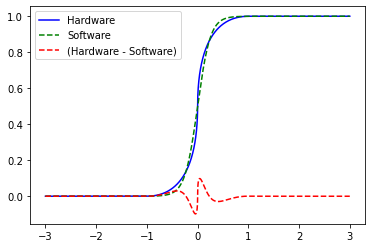

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 10000)
y1 = np.vectorize(hardware_sigmoid)(x)
y2 = np.vectorize(software_sigmoid)(x, beta=8)
#y3 = np.vectorize(software_sigmoid)(x, beta=1)
y_diff = y1 - y2

fig = plt.figure()
plt.plot(x, y1, 'b-', label='Hardware')
plt.plot(x, y2, 'g--', label='Software')
plt.plot(x, y_diff, 'r--', label='(Hardware - Software)')
plt.legend()
plt.show()

Plot gradients and differences

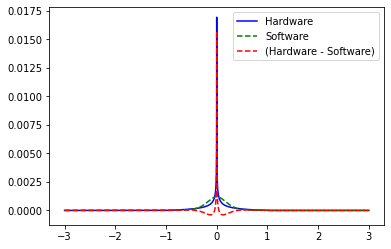

In [3]:
grad_y1 = np.gradient(y1, edge_order=1)
grad_y2 = np.gradient(y2, edge_order=1)

grad_diff = grad_y1 - grad_y2

fig = plt.figure()
plt.plot(x, grad_y1, 'b-', label='Hardware')
plt.plot(x, grad_y2, 'g--', label='Software')
plt.plot(x, grad_diff, 'r--', label='(Hardware - Software)')

plt.legend()
plt.show()

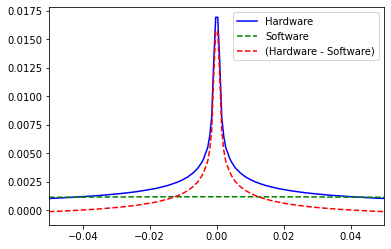

In [4]:
fig = plt.figure()
plt.plot(x, grad_y1, 'b-', label='Hardware')
plt.plot(x, grad_y2, 'g--', label='Software')
plt.plot(x, grad_diff, 'r--', label='(Hardware - Software)')

plt.xlim(-0.05, 0.05)
plt.legend()
plt.show()